Here we can find two algorithms:
- K-means - implementation in kmean.py
- DBSCAN - implementations in dbscan_optimized.py

Algs shown on Emnist - Mnist dataset

https://www.geeksforgeeks.org/k-means-clustering-introduction/ - kmeans

https://www.geeksforgeeks.org/dbscan-clustering-in-ml-density-based-clustering/ - dbscan

In [ ]:
import numpy as np
import idx2numpy
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from collections import Counter

In [ ]:
from helpers import get_labels, make_confusion_matrix, batch_simulation_dbscan 
from kmeans import MyKMeans
from dbscan_optimized import MyDBSCAN

In [ ]:
decompressed_path = '../data'
train_images = idx2numpy.convert_from_file(f'{decompressed_path}/emnist-mnist-train-images-idx3-ubyte')
train_labels = idx2numpy.convert_from_file(f'{decompressed_path}/emnist-mnist-train-labels-idx1-ubyte')
test_images = idx2numpy.convert_from_file(f'{decompressed_path}/emnist-mnist-test-images-idx3-ubyte')
test_labels = idx2numpy.convert_from_file(f'{decompressed_path}/emnist-mnist-test-labels-idx1-ubyte')

In [11]:
print(f"train images: {len(train_images)}")
print(f"train labels: {len(train_labels)}")
print(f"test images: {len(test_images)}")
print(f"test labels: {len(test_labels)}")

train images: 60000
train labels: 60000
test images: 10000
test labels: 10000


In [12]:
print("Shapes:")
print(f"train_images: {train_images.shape}")
print(f"train_labels: {train_labels.shape}")
print(f"test_images: {test_images.shape}")
print(f"test_labels: {test_labels.shape}")

Shapes:
train_images: (60000, 28, 28)
train_labels: (60000,)
test_images: (10000, 28, 28)
test_labels: (10000,)


In [13]:
train_data = train_images.reshape(-1, 784)
test_data = test_images.reshape(-1, 784)

In [14]:
scaler = MinMaxScaler()

In [15]:
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

In [16]:
print("Shapes:")
print(f"train_images: {train_images.shape}")
print(f"train_labels: {train_labels.shape}")
print(f"test_images: {test_images.shape}")
print(f"test_labels: {test_labels.shape}")

Shapes:
train_images: (60000, 28, 28)
train_labels: (60000,)
test_images: (10000, 28, 28)
test_labels: (10000,)


Visualize elements from the MNIST dataset

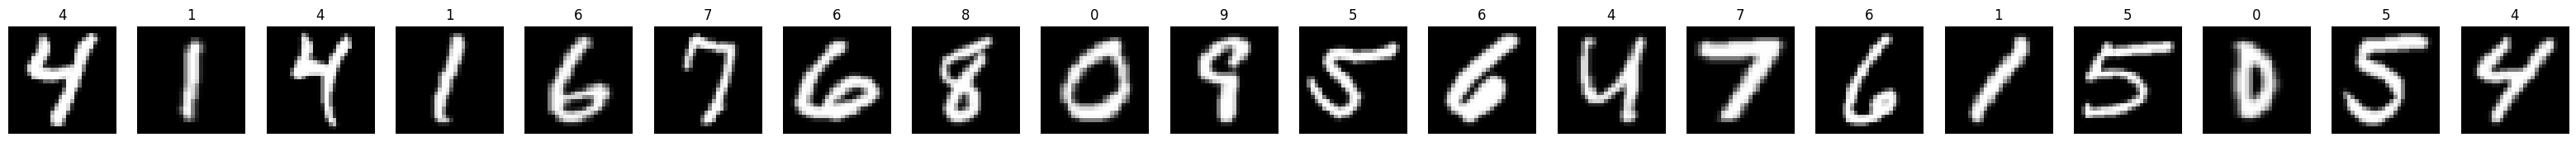

In [105]:
n_digits = 20
fig, axes = plt.subplots(nrows=1, ncols=n_digits, figsize=(n_digits*2, n_digits))

for i in range(n_digits):
    rotated_img = np.rot90(train_images[i], k=1)          # rotate 90° CCW
    flipped_img = np.flipud(rotated_img)                   # flip upside down
    axes[i].imshow(flipped_img, cmap='gray')
    axes[i].set_title(f'{train_labels[i]}')
    axes[i].axis('off')

In [130]:
Counter(train_labels)

Counter({np.uint8(4): 6000,
         np.uint8(1): 6000,
         np.uint8(6): 6000,
         np.uint8(7): 6000,
         np.uint8(8): 6000,
         np.uint8(0): 6000,
         np.uint8(9): 6000,
         np.uint8(5): 6000,
         np.uint8(3): 6000,
         np.uint8(2): 6000})

Dataset is balanced

## K-means algorithm

In [126]:
n_clusters = 20
n_init=5

In [127]:
my_kmeans = MyKMeans(n_clusters=n_clusters,n_init=n_init, verbose=1).fit(train_data)

fitting...
Iteration number: 0/5 of different centroids
Initializing centroids...
initializing centroid: 1...
initializing centroid: 2...
initializing centroid: 3...
initializing centroid: 4...
initializing centroid: 5...
initializing centroid: 6...
initializing centroid: 7...
initializing centroid: 8...
initializing centroid: 9...
initializing centroid: 10...
initializing centroid: 11...
initializing centroid: 12...
initializing centroid: 13...
initializing centroid: 14...
initializing centroid: 15...
initializing centroid: 16...
initializing centroid: 17...
initializing centroid: 18...
initializing centroid: 19...


KeyboardInterrupt: 

Check the inertia

In [ ]:
print(my_kmeans.inertia)

2450933.17778572


In [ ]:
mapping = get_labels(my_kmeans.labels, train_labels)

In [ ]:
test_clusters = my_kmeans.predict(test_data)

In [ ]:
y_pred = np.array([mapping[c] for c in test_clusters])

In [ ]:
y_true = test_labels

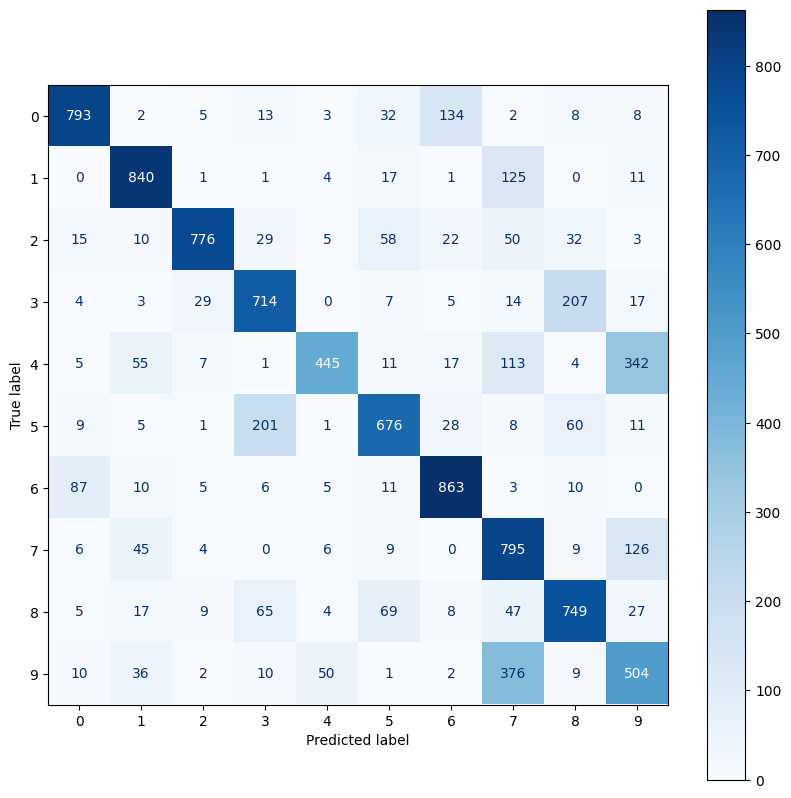

In [ ]:
fig, ax = make_confusion_matrix(y_true, y_pred)
# fig.show()

In [ ]:
centroids = my_kmeans.centroids

Plot the centroids

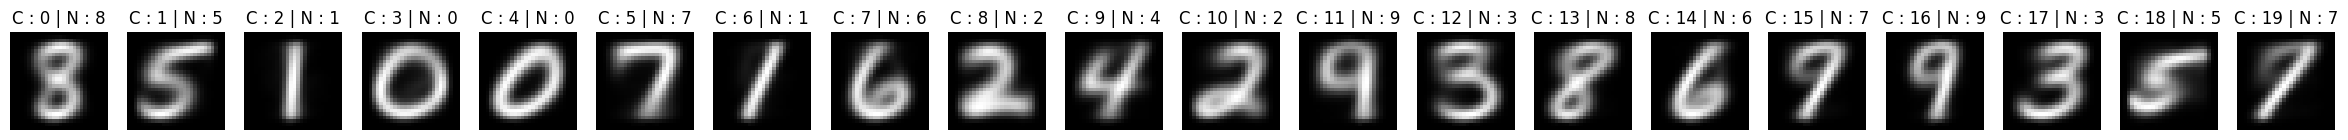

In [ ]:
fig, axes = plt.subplots(1, n_clusters, figsize=(30,10))
for c in range(n_clusters):
    centroid_img = centroids[c].reshape(28, 28)
    rotated_img = np.rot90(centroid_img, k=1)   # rotate 90° CCW
    flipped_img = np.flipud(rotated_img)        # flip vertically
    axes[c].imshow(flipped_img, cmap='gray')
    axes[c].set_title(f"C : {c} | N : {mapping[c]}")
    axes[c].axis('off')
plt.show()

## DBSCAN

Observation:
- It either creates a lot of small clusters (close to number of samples)
- Or collapses everything into one giant cluster classifying everything as a single number

In [ ]:
radius_list = [2,2.5,3,3.5,4,4.5,5]
neighbors_list = [2,3,4,5,6]
save_folder_path = './images'

In [128]:
lengths = batch_simulation_dbscan(radius_list=radius_list,
                 neighbors_list=neighbors_list,
                 data=train_data,
                 labels=train_labels,
                 folder_path=save_folder_path,
                 appendix="_raw_data",
                 verbose=3)

simulation for radius: 2, neighbors: 2
Large dataset (60000 samples), using memory-efficient approach
Fitting memory-efficient DBSCAN...


KeyboardInterrupt: 

### PCA

In [ ]:
n_components=15

In [ ]:
pca = PCA(n_components=n_components).fit(train_data)

In [ ]:
X_pca = pca.transform(train_data)

/home/h20/Documents/Uni4/AI/list4/JSCode/helpers.py:40: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(10, 10))


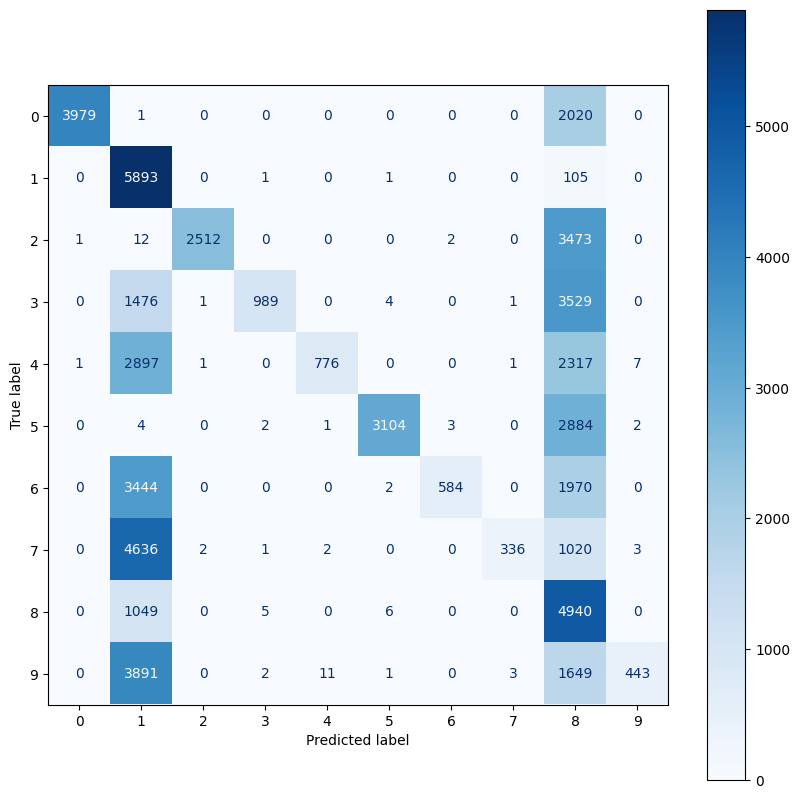

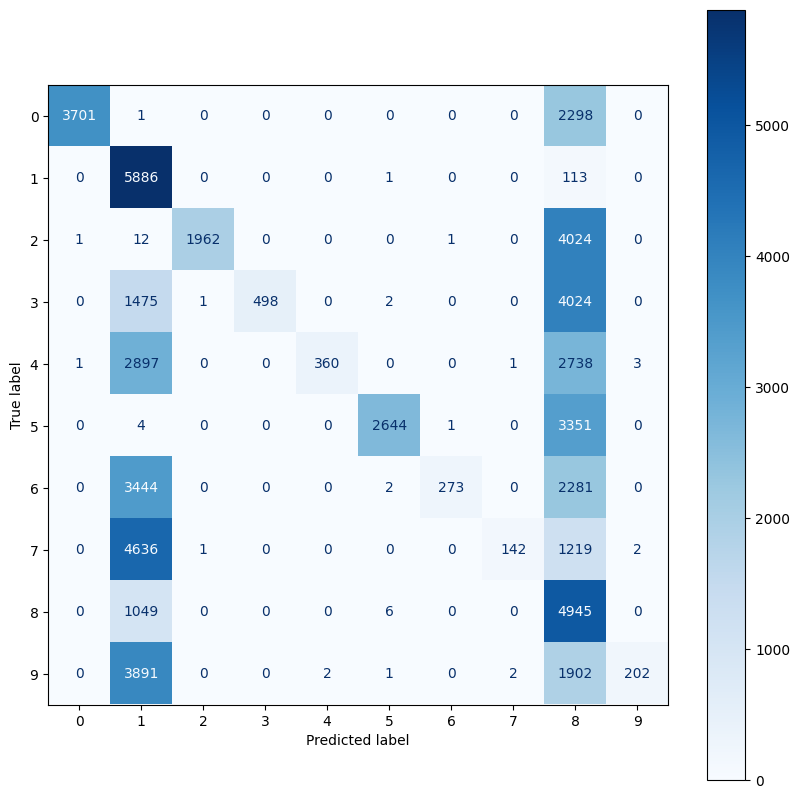

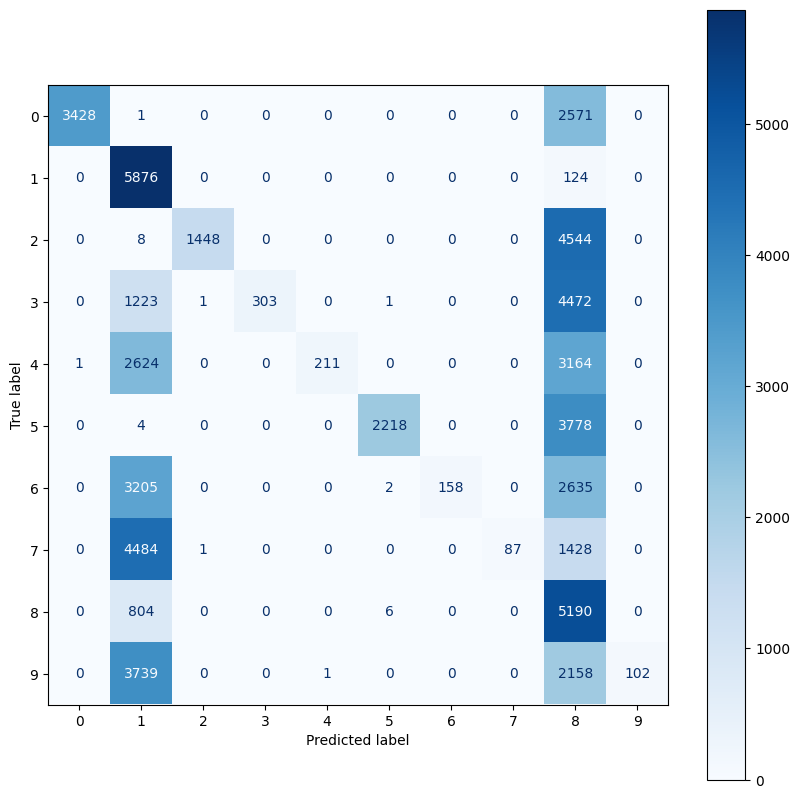

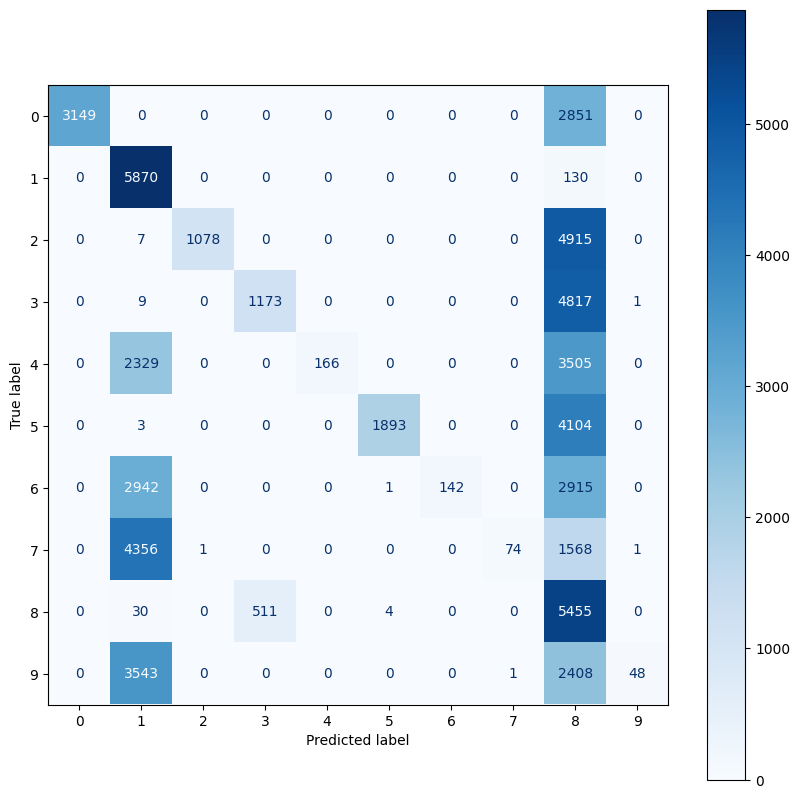

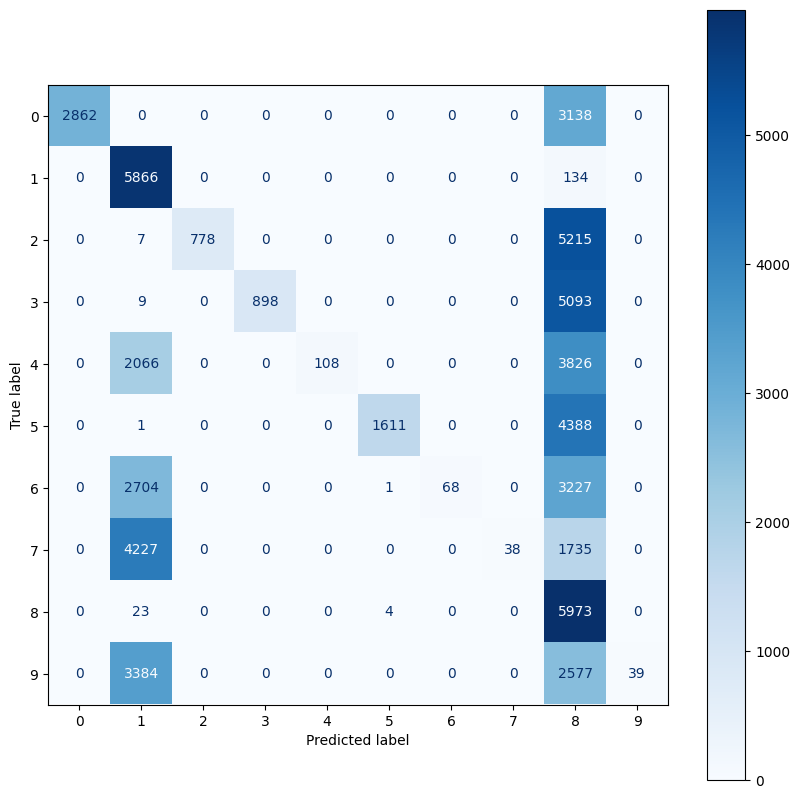

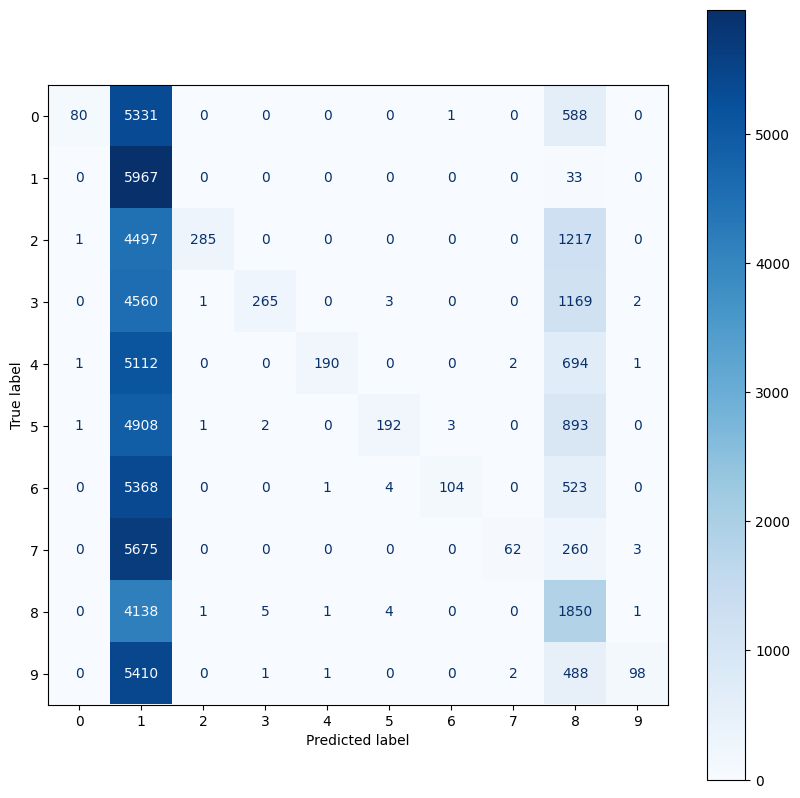

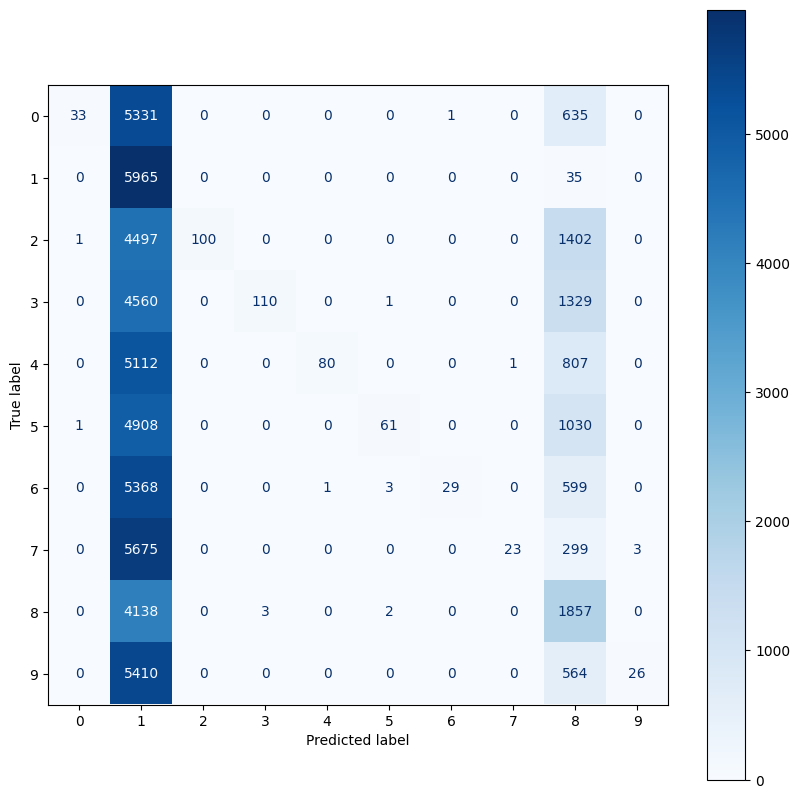

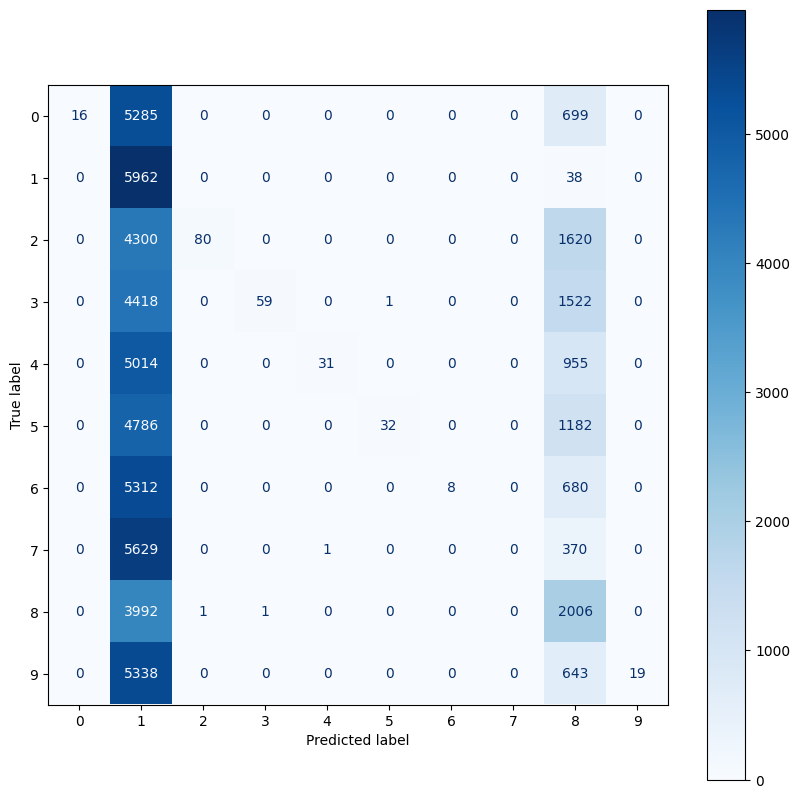

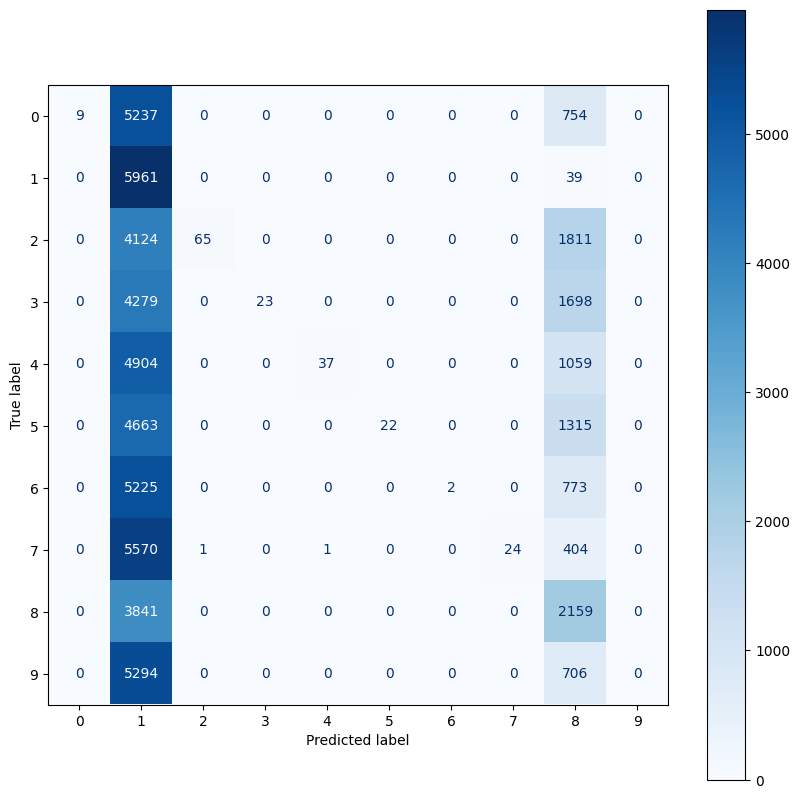

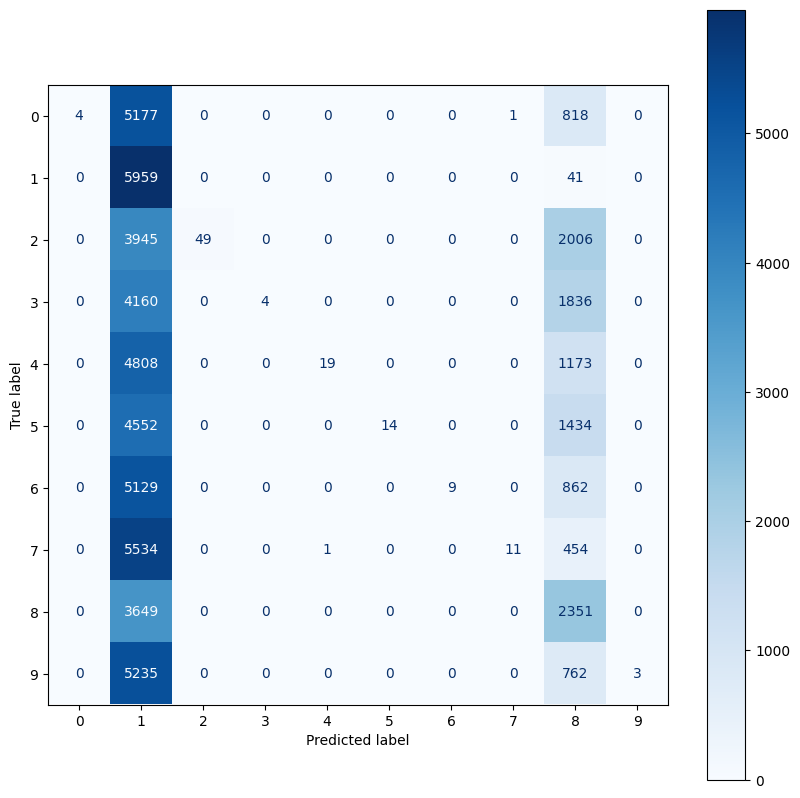

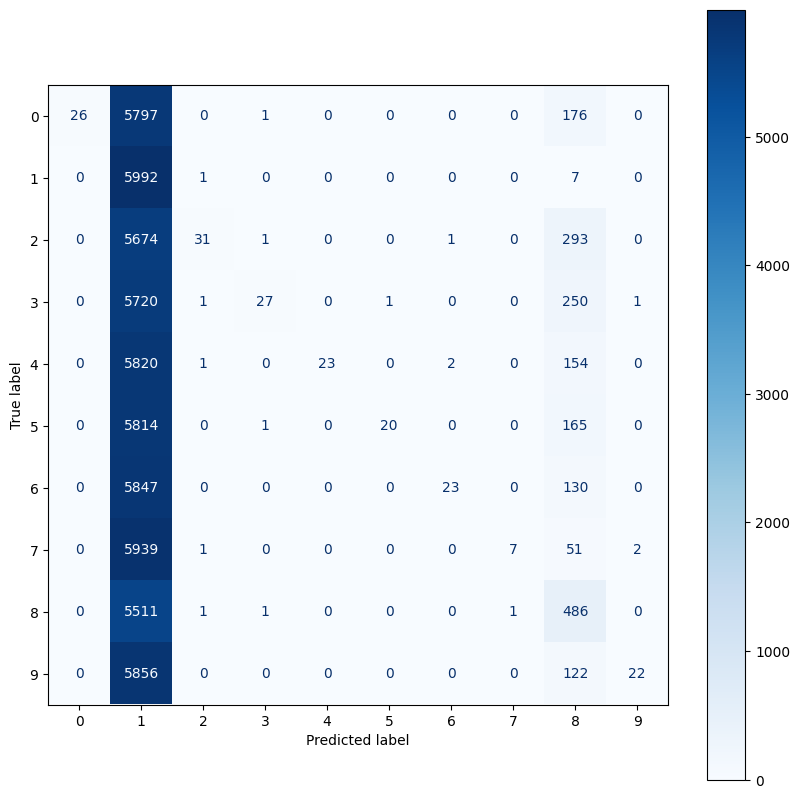

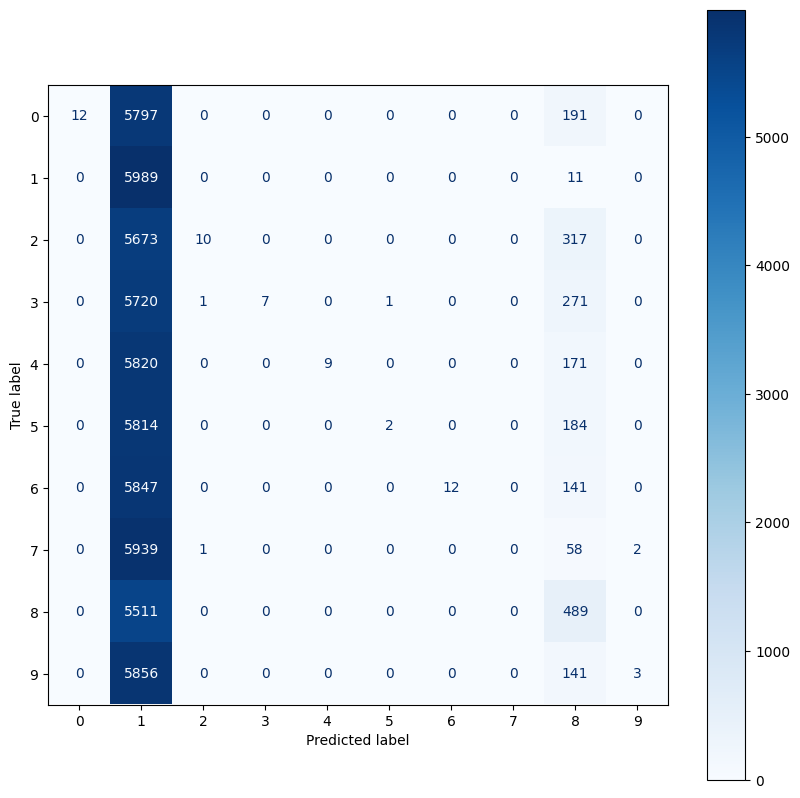

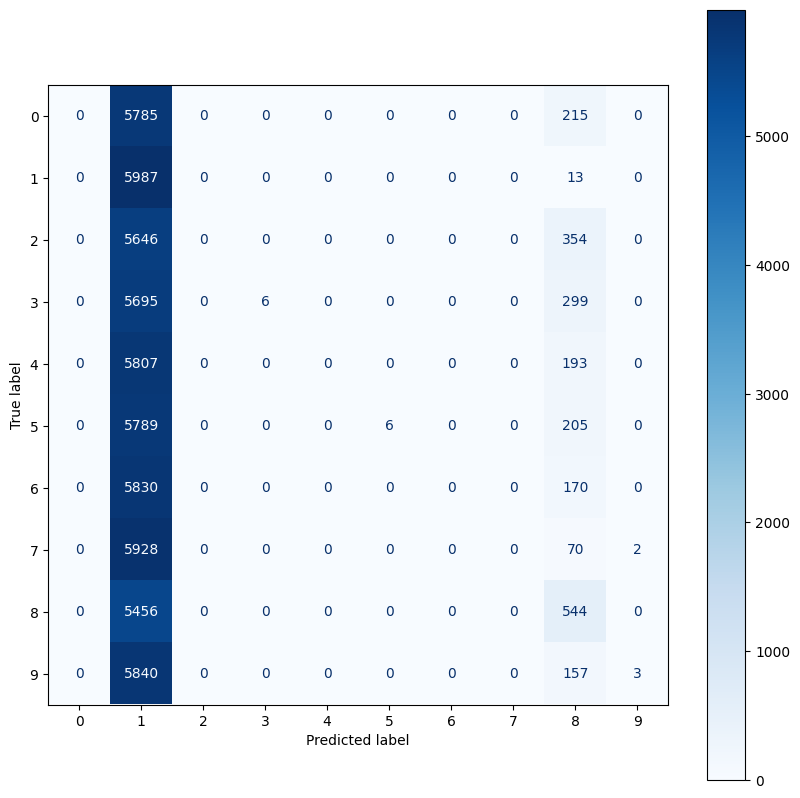

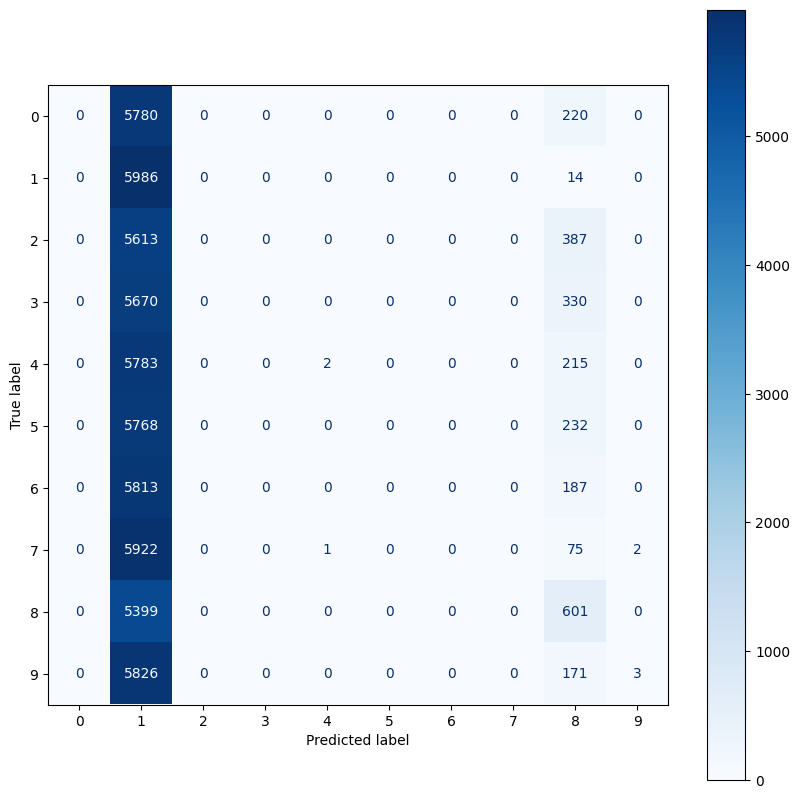

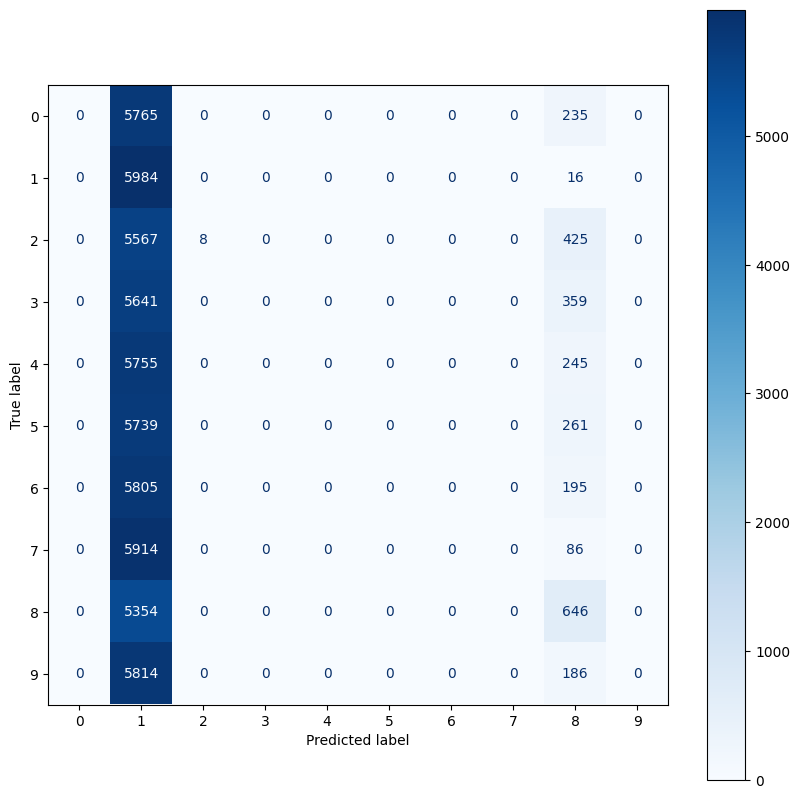

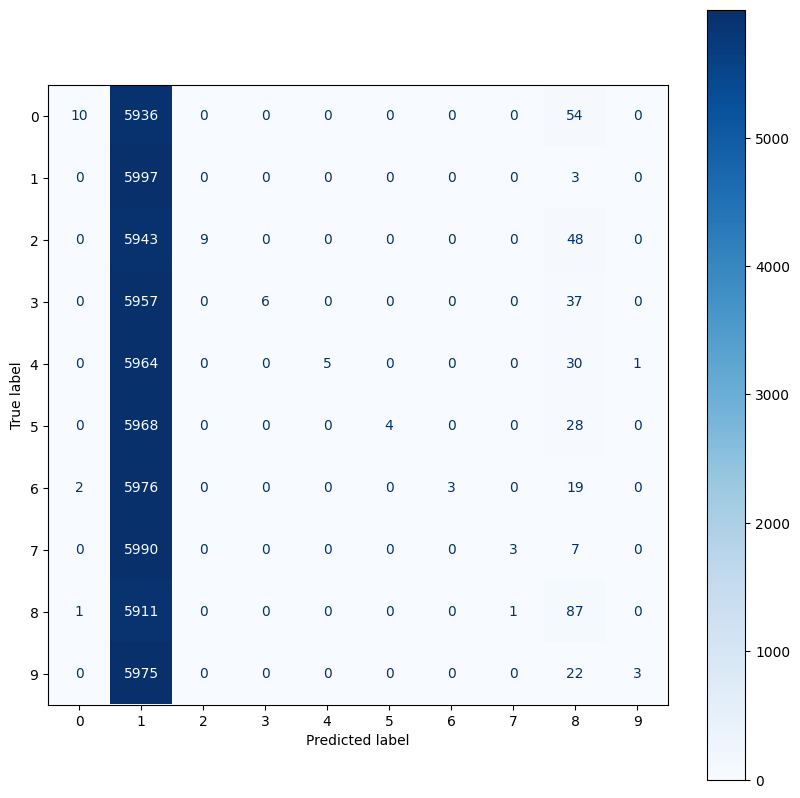

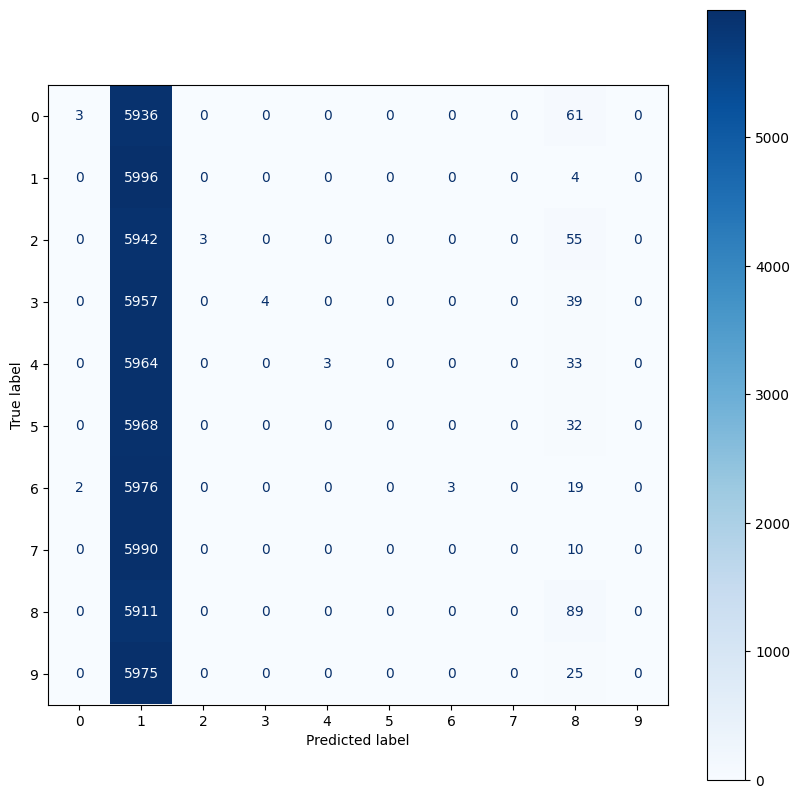

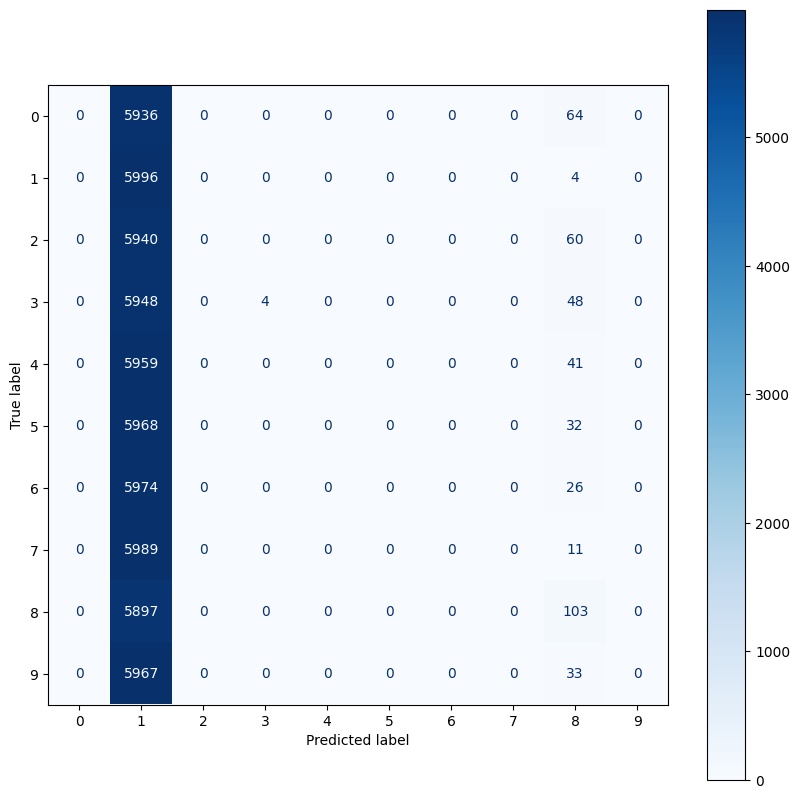

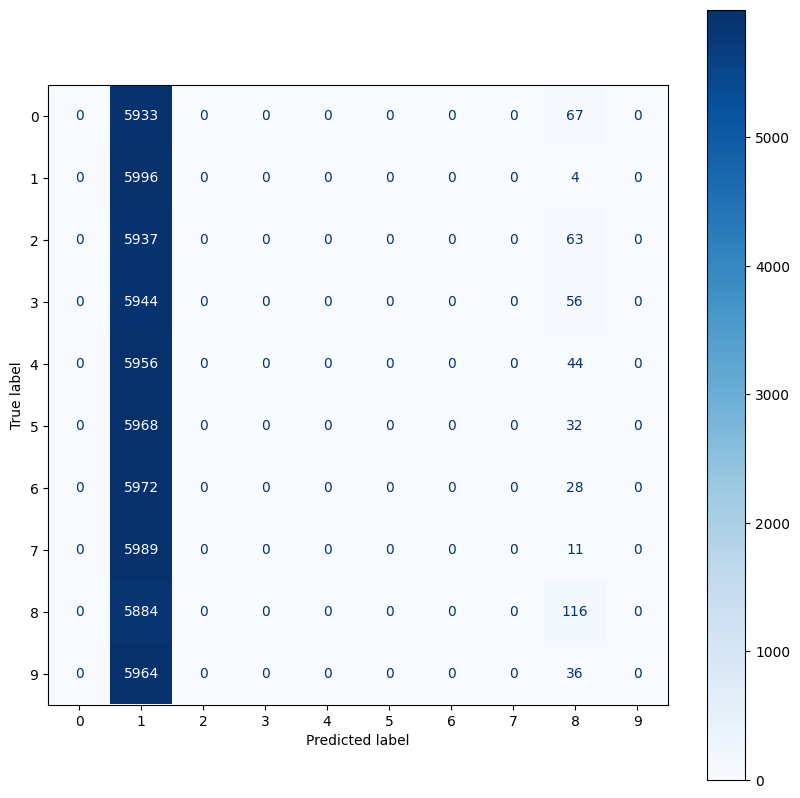

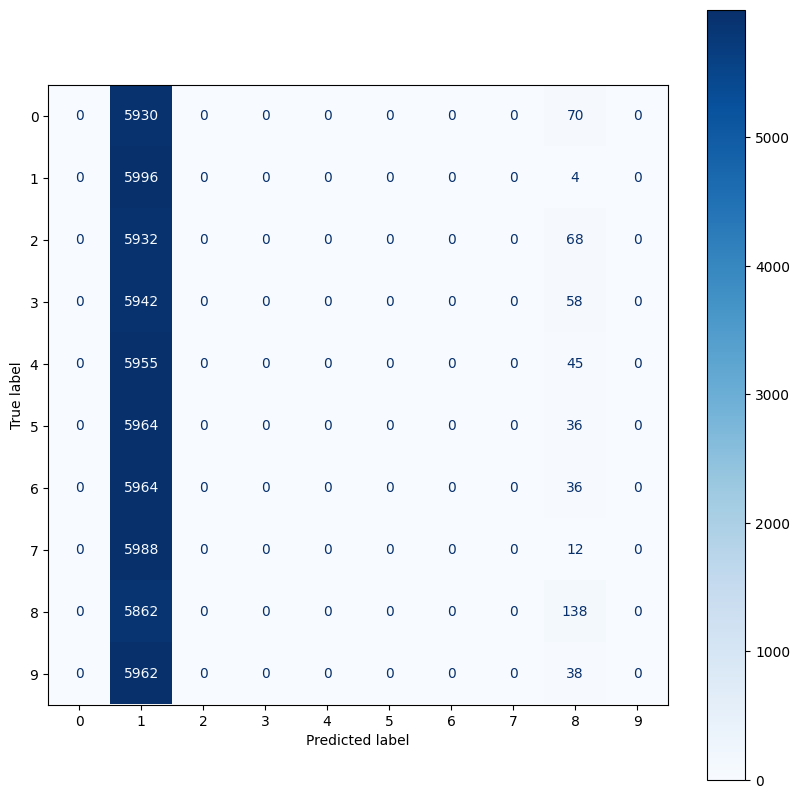

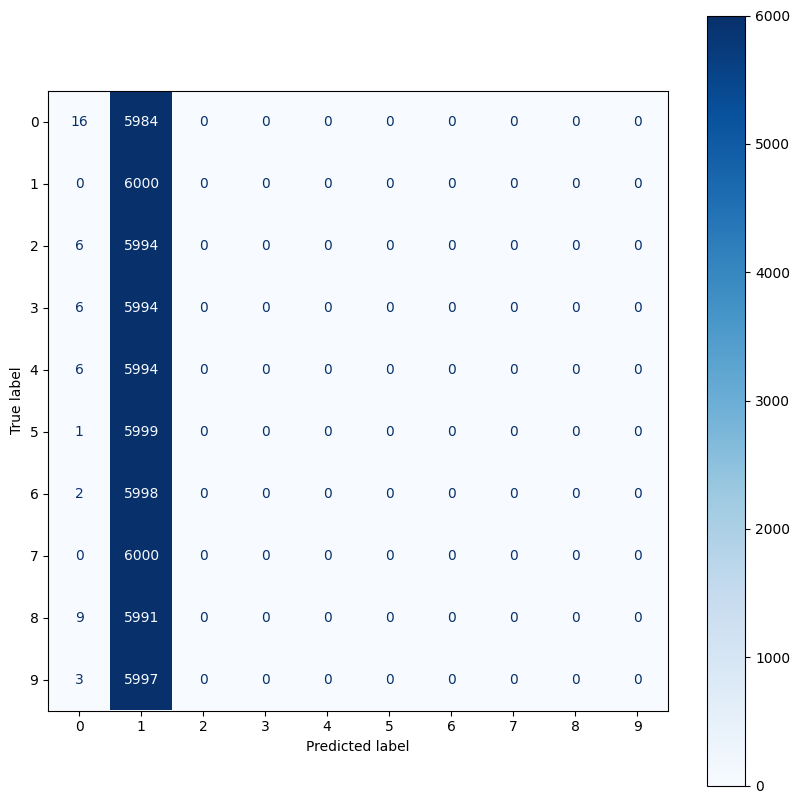

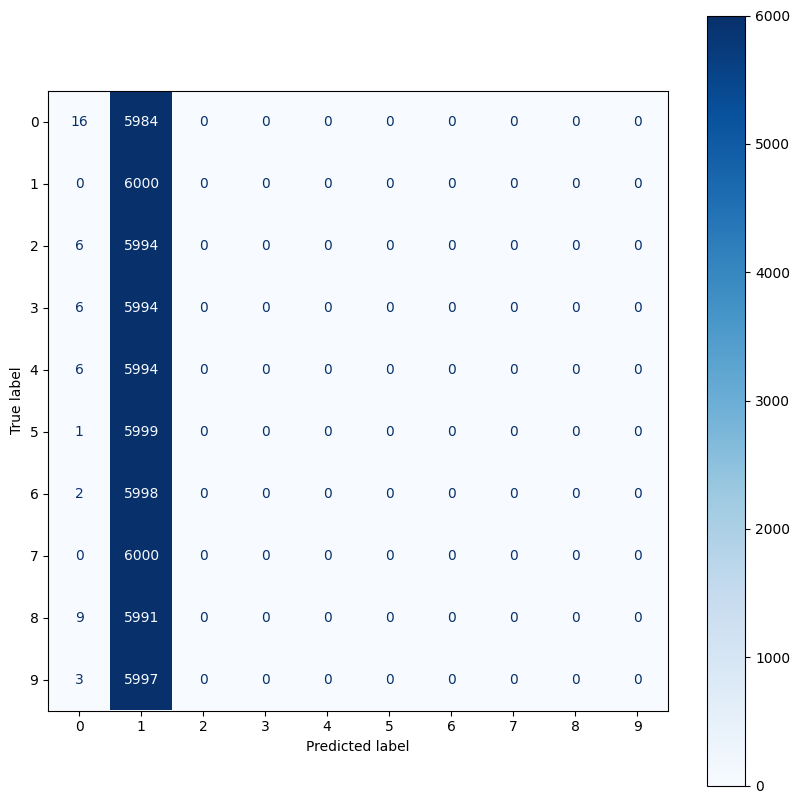

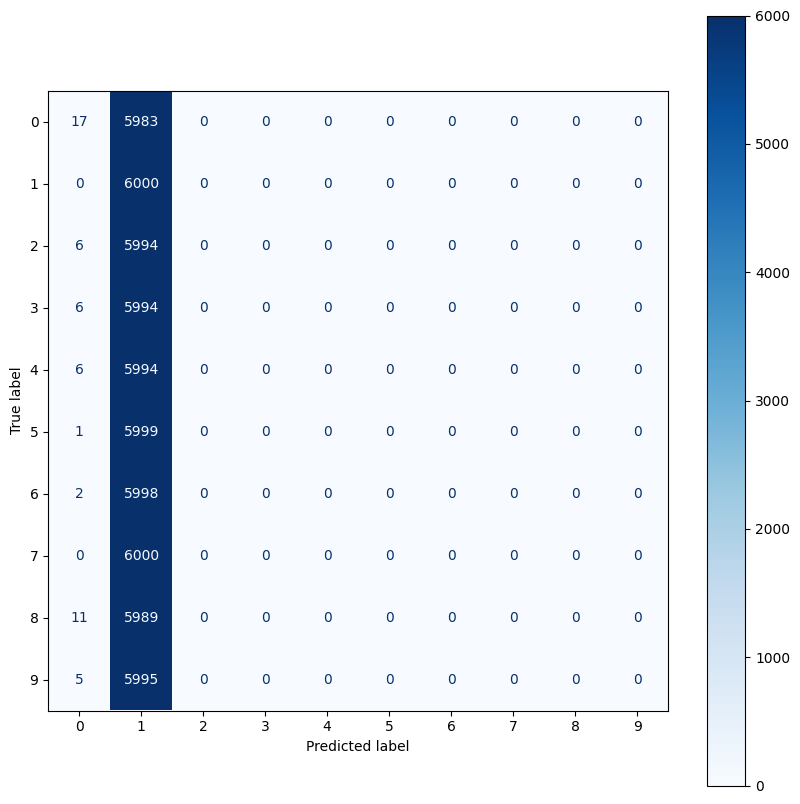

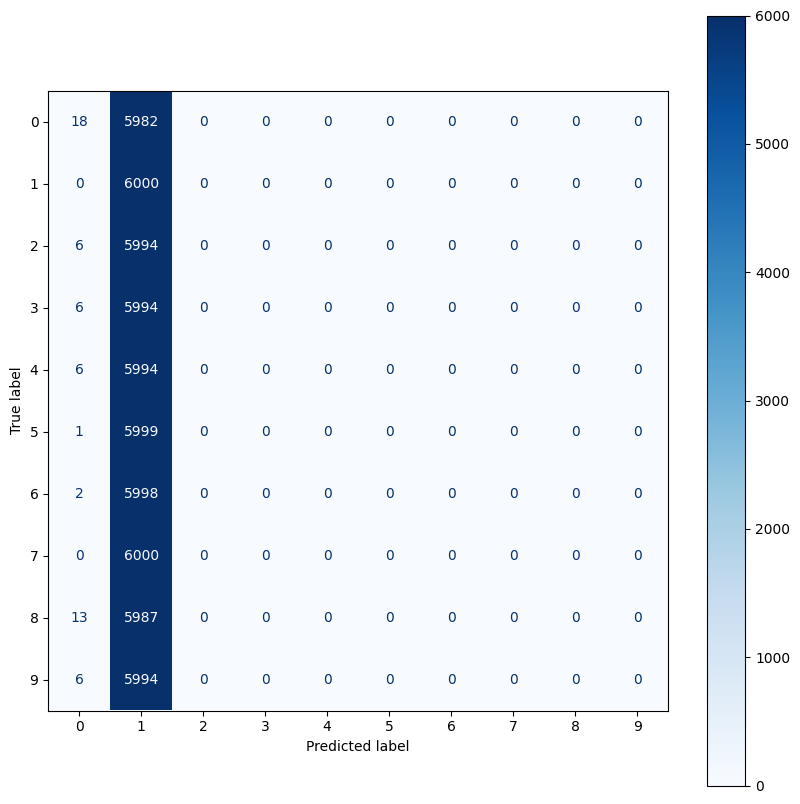

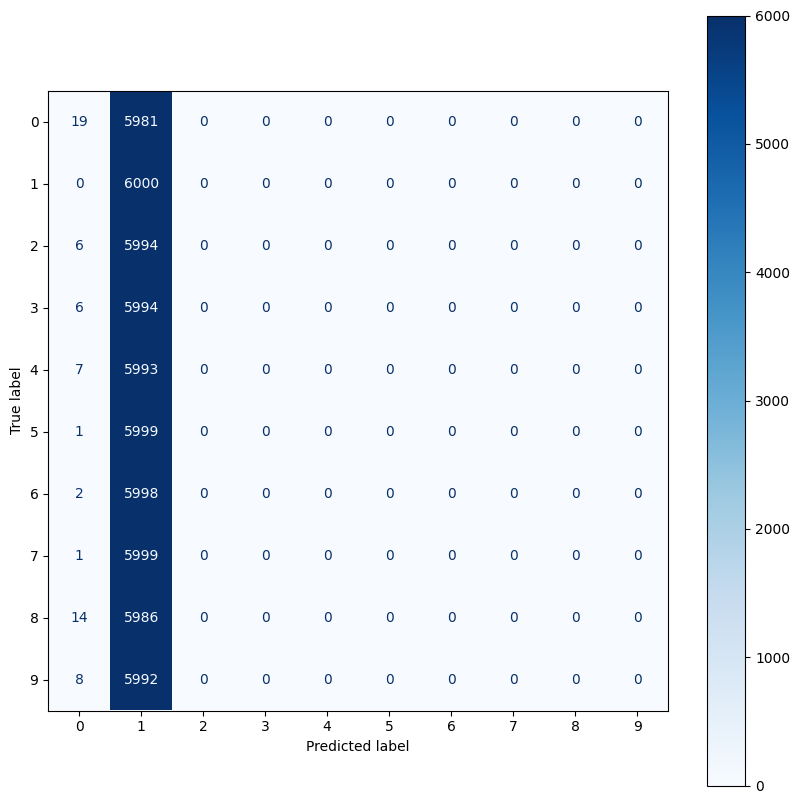

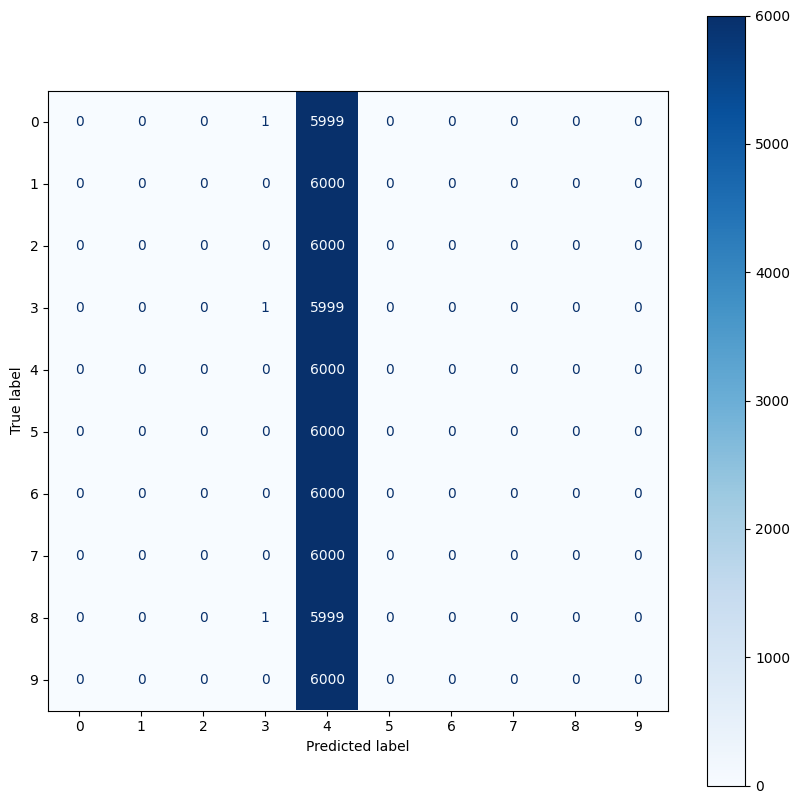

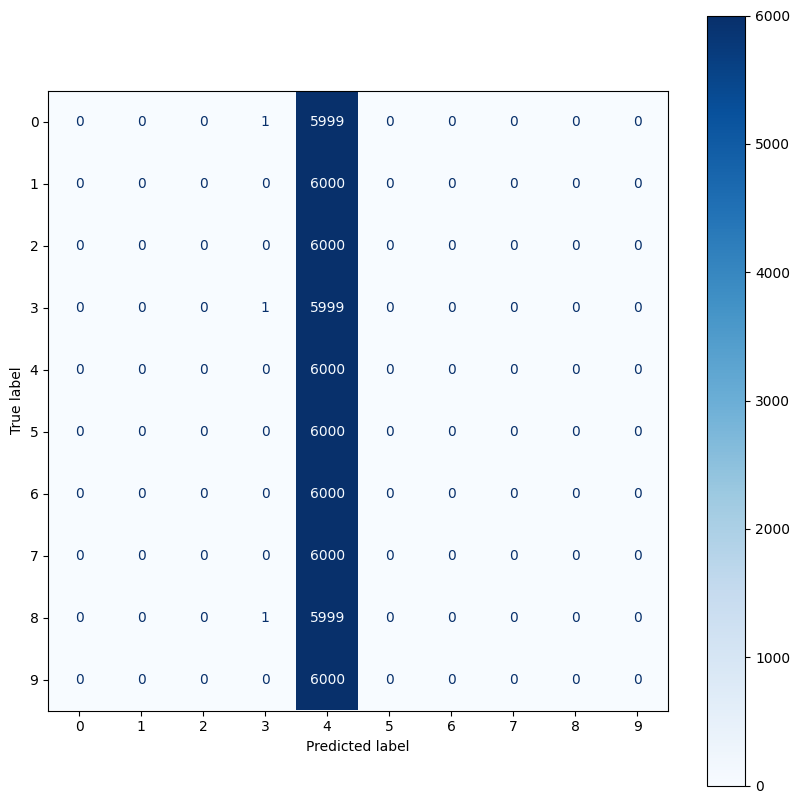

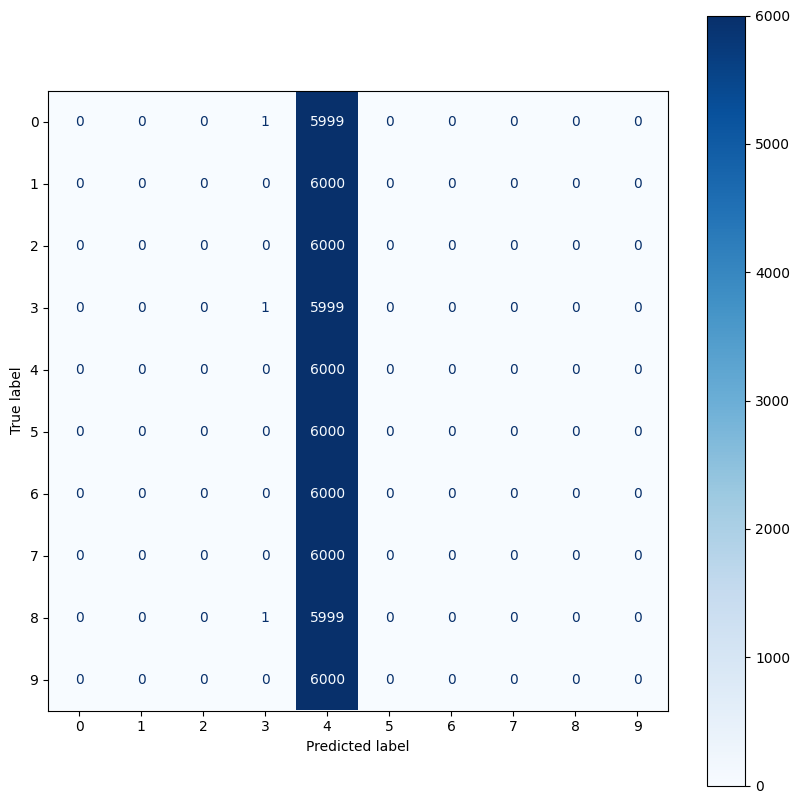

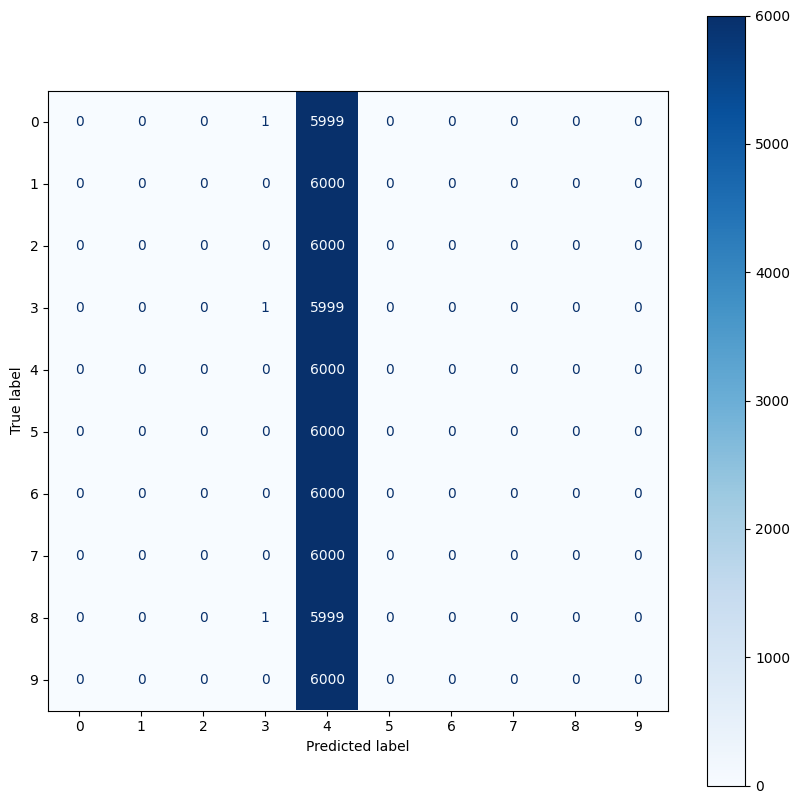

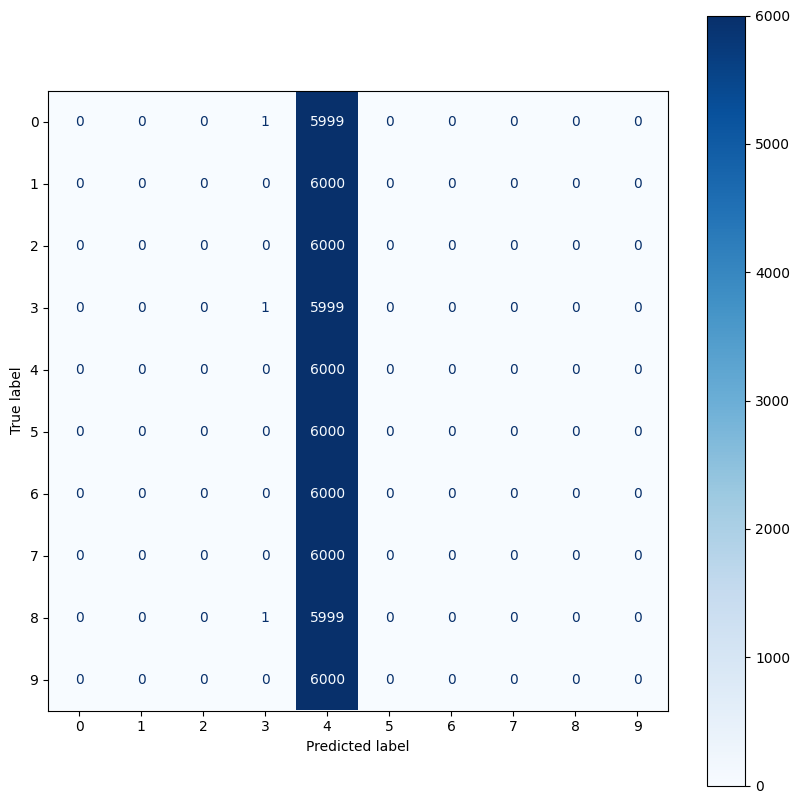

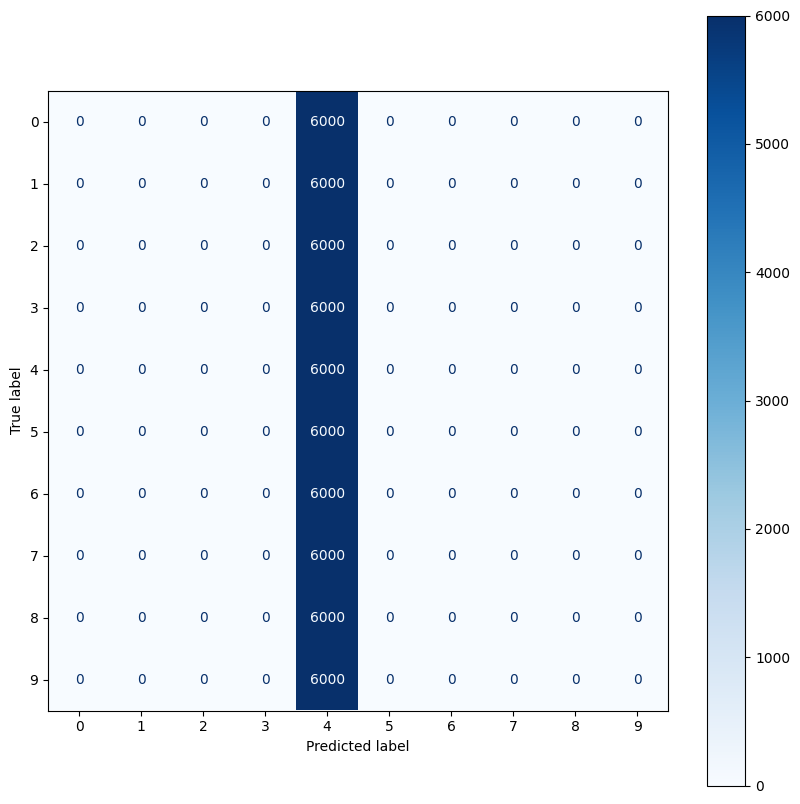

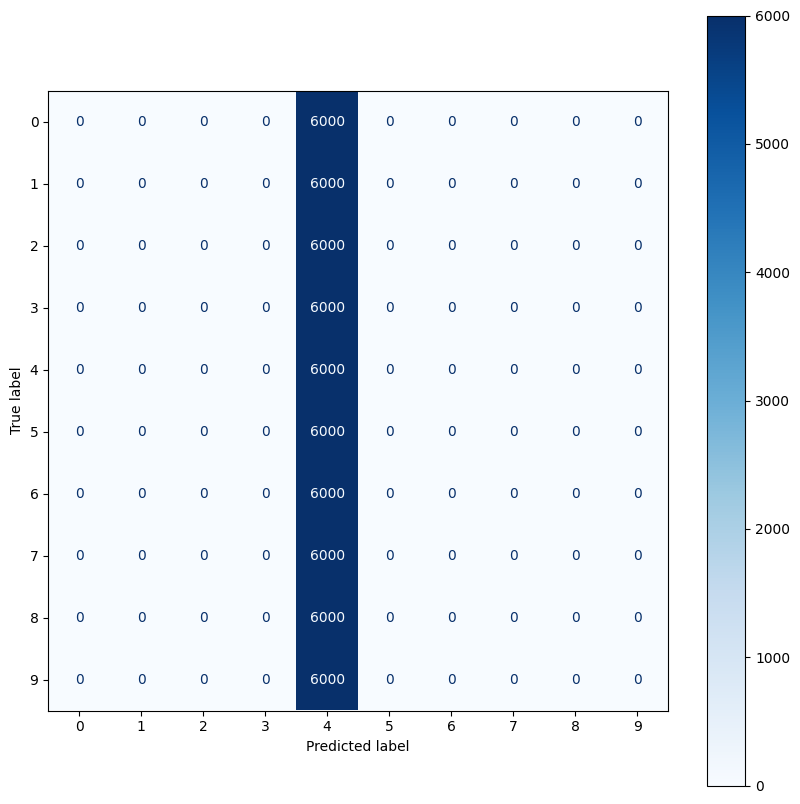

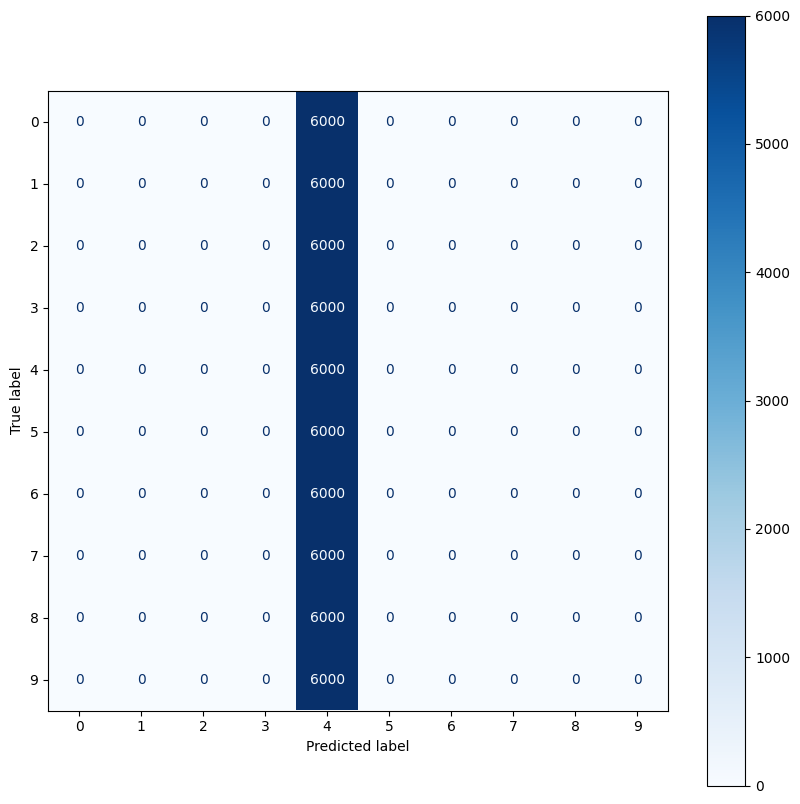

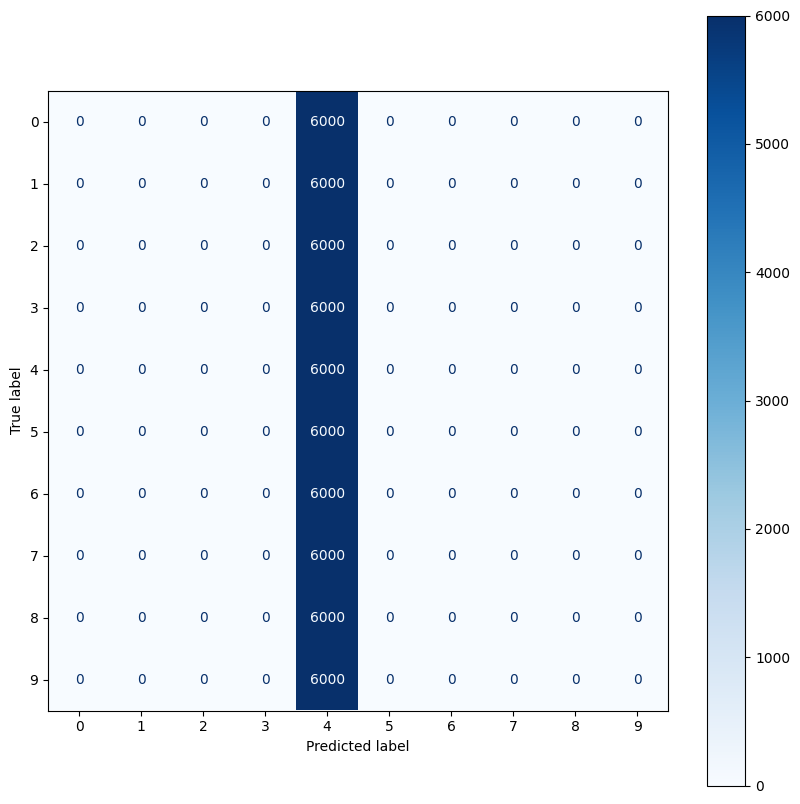

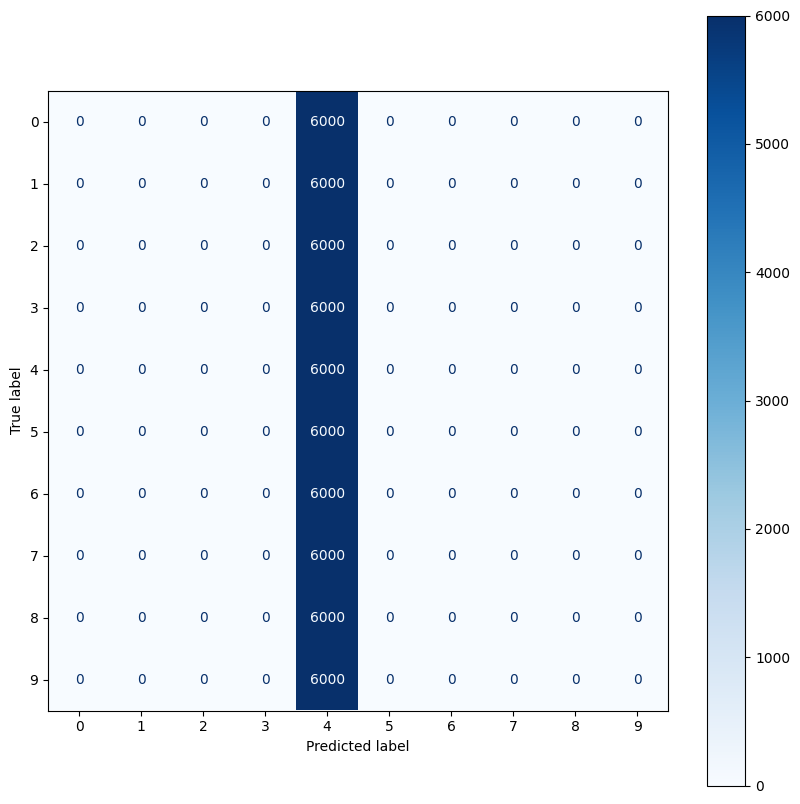

In [ ]:
lengths_pca = batch_simulation_dbscan(radius_list=radius_list,
                 neighbors_list=neighbors_list,
                 data=X_pca,
                 labels=train_labels,
                 folder_path=save_folder_path,
                               appendix="_pca_15_dim")

### TSNE

In [ ]:
tsne = TSNE(n_components=3, random_state=42, verbose=3)

In [ ]:
X_tsne = tsne.fit_transform(train_data)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 60000 samples in 0.011s...
[t-SNE] Computed neighbors for 60000 samples in 12.259s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60000
[t-SNE] Computed conditional probabilities for sample 2000 / 60000
[t-SNE] Computed conditional probabilities for sample 3000 / 60000
[t-SNE] Computed conditional probabilities for sample 4000 / 60000
[t-SNE] Computed conditional probabilities for sample 5000 / 60000
[t-SNE] Computed conditional probabilities for sample 6000 / 60000
[t-SNE] Computed conditional probabilities for sample 7000 / 60000
[t-SNE] Computed conditional probabilities for sample 8000 / 60000
[t-SNE] Computed conditional probabilities for sample 9000 / 60000
[t-SNE] Computed conditional probabilities for sample 10000 / 60000
[t-SNE] Computed conditional probabilities for sample 11000 / 60000
[t-SNE] Computed conditional probabilities for sample 12000 / 60000
[t-SNE] Computed conditional probabilities for sa

/home/h20/Documents/Uni4/AI/list4/JSCode/helpers.py:40: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(10, 10))


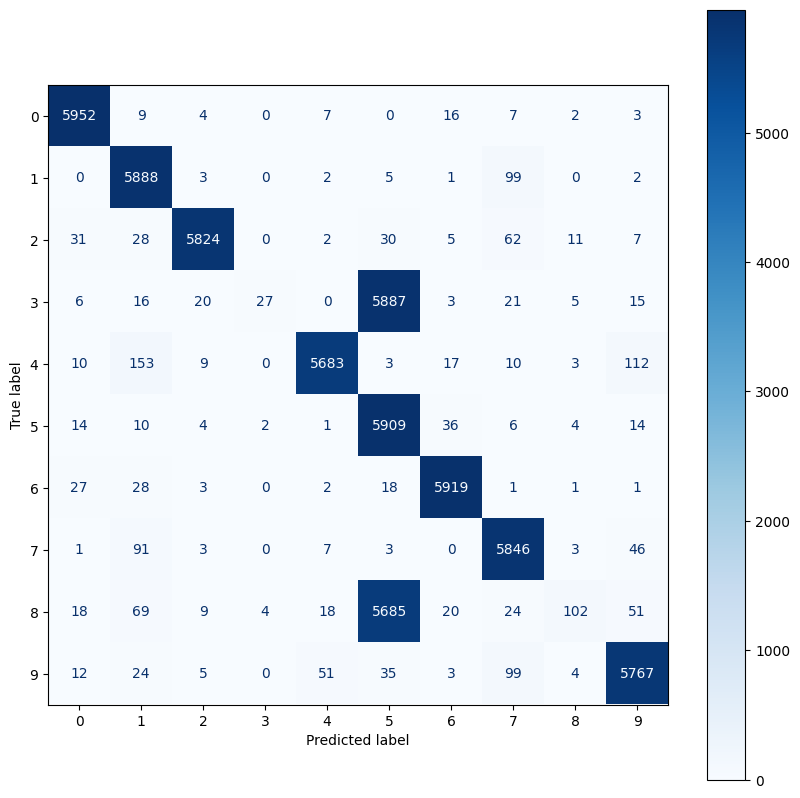

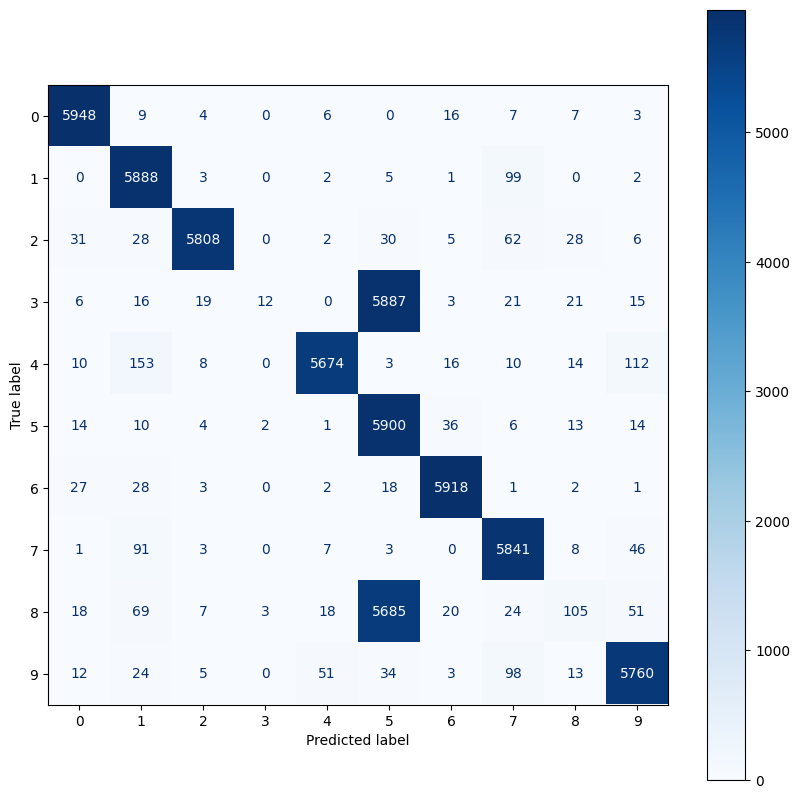

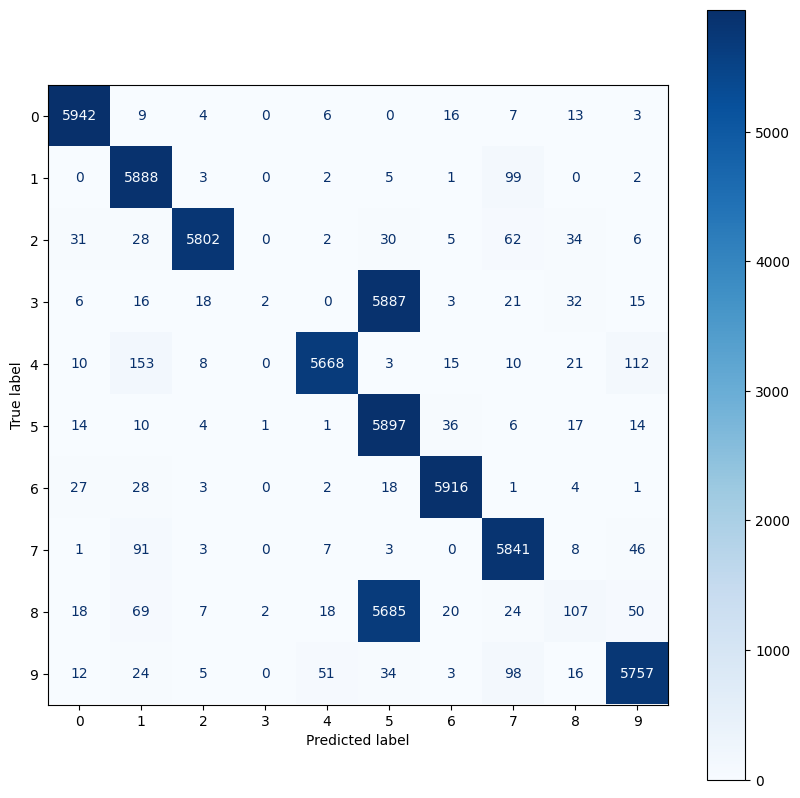

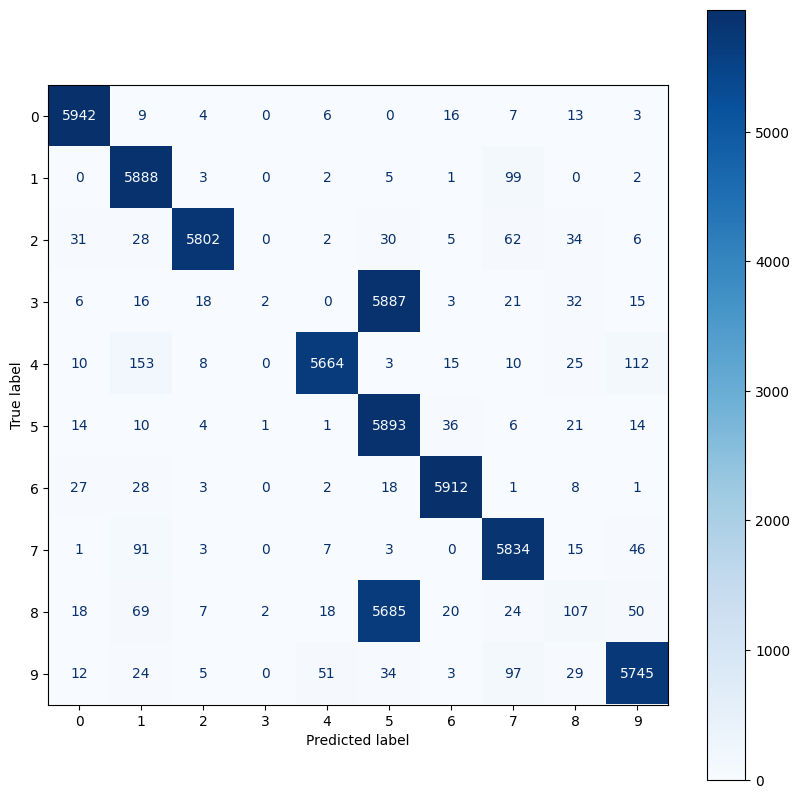

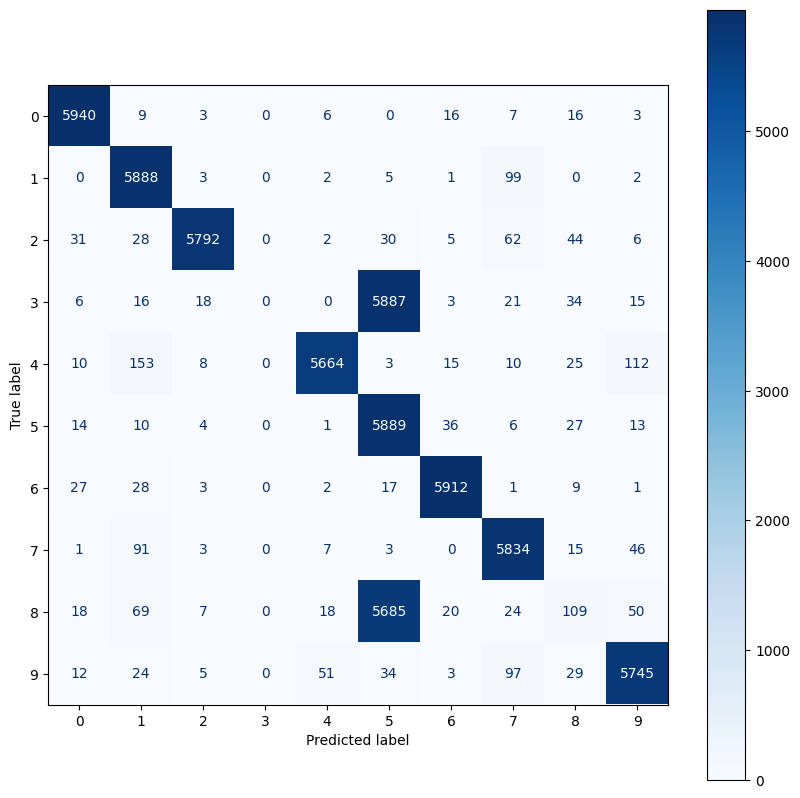

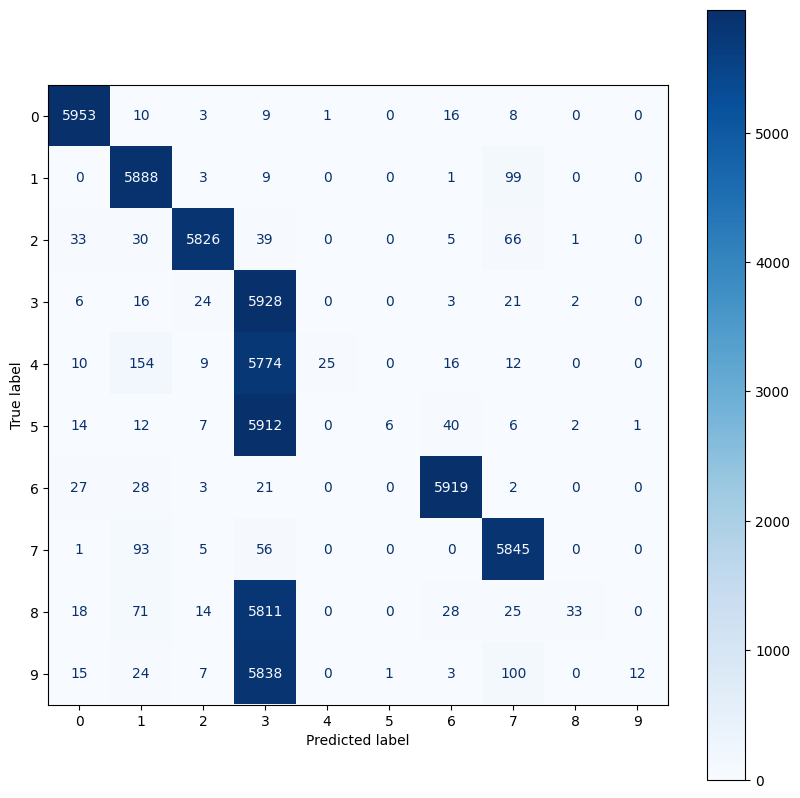

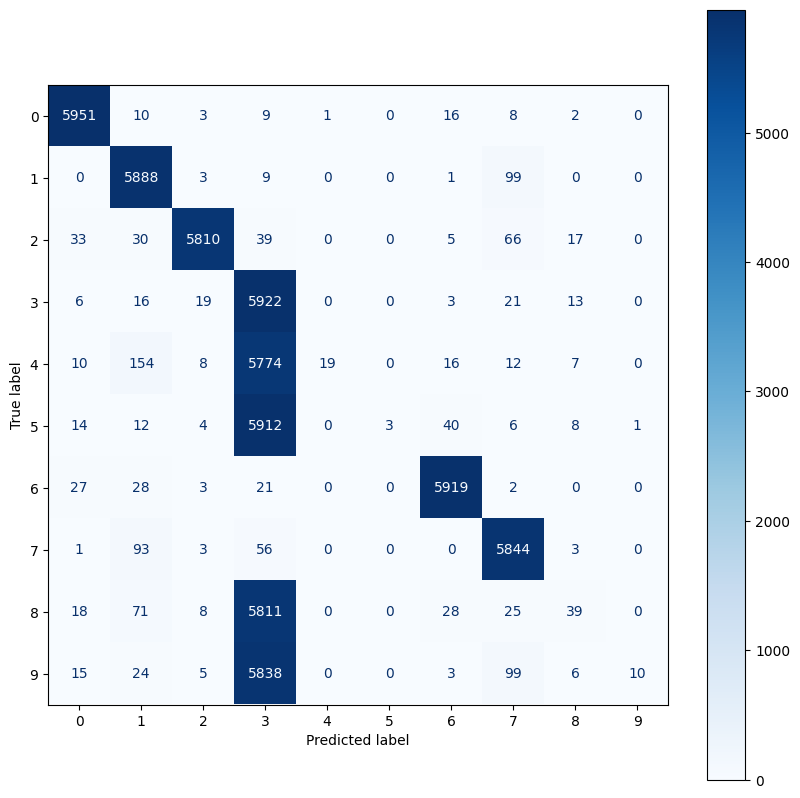

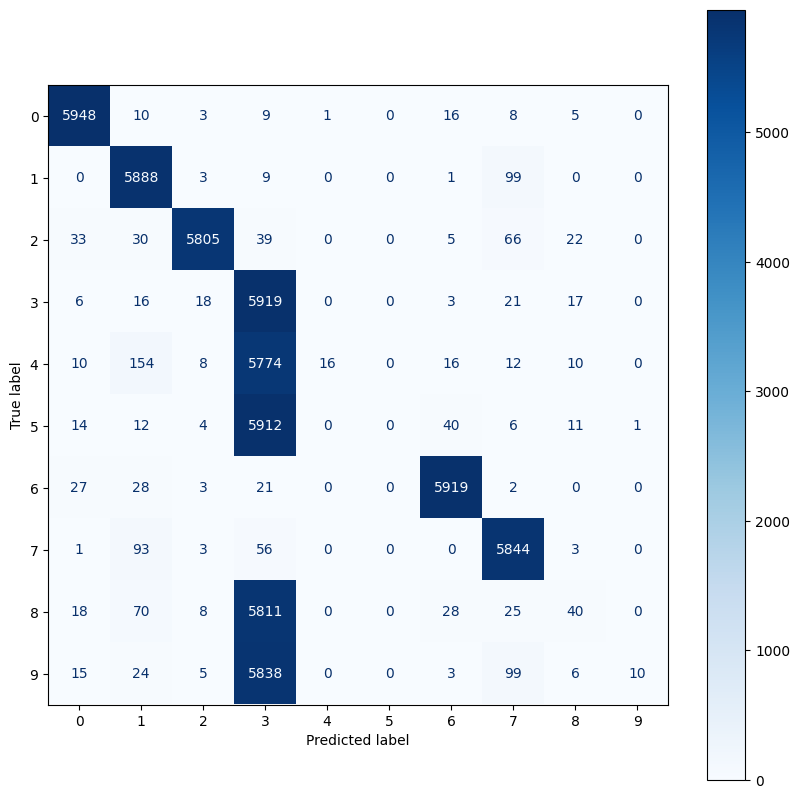

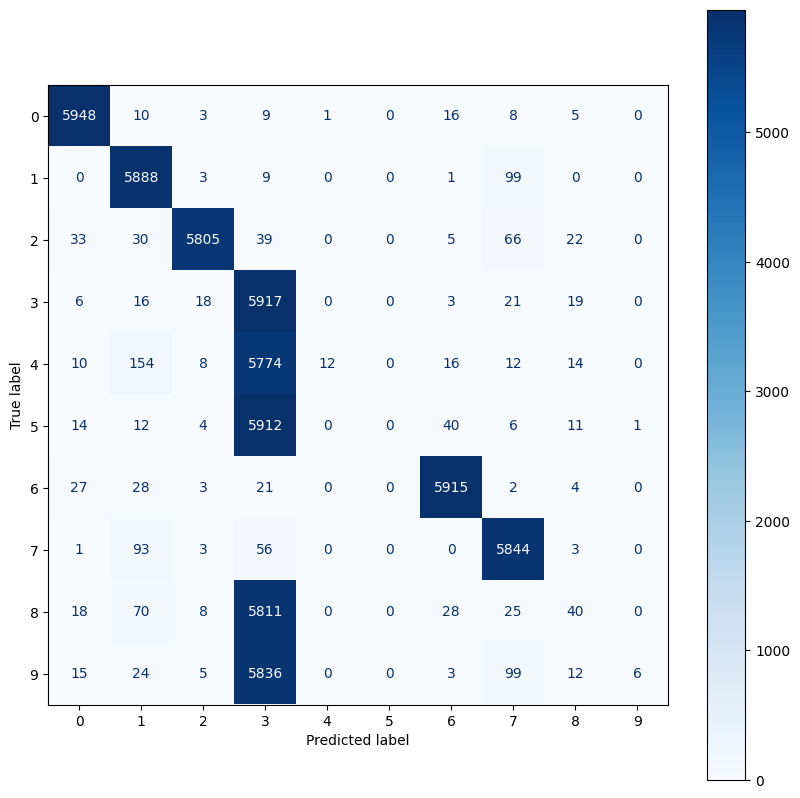

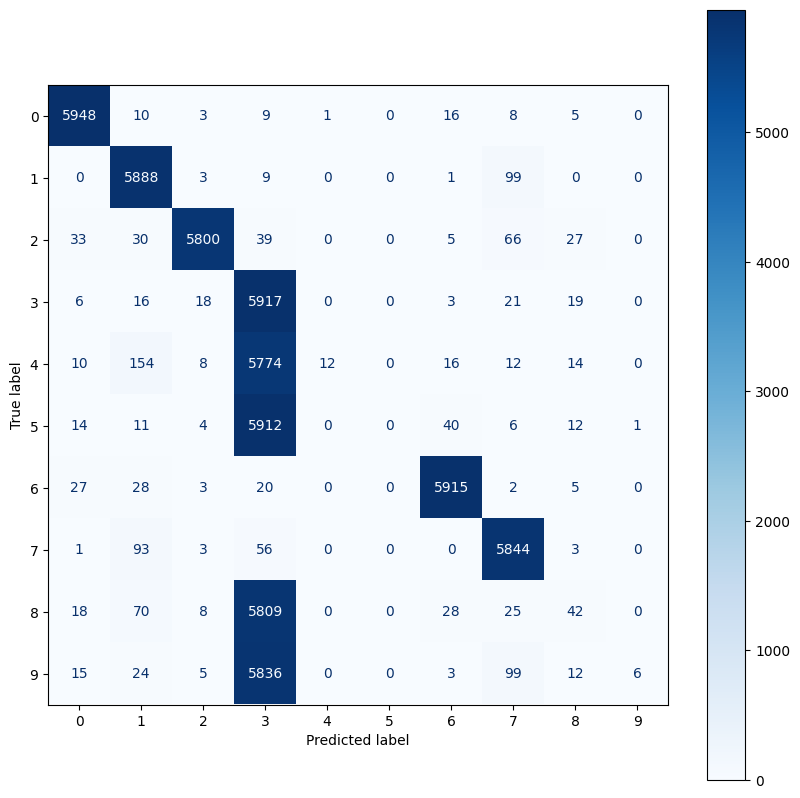

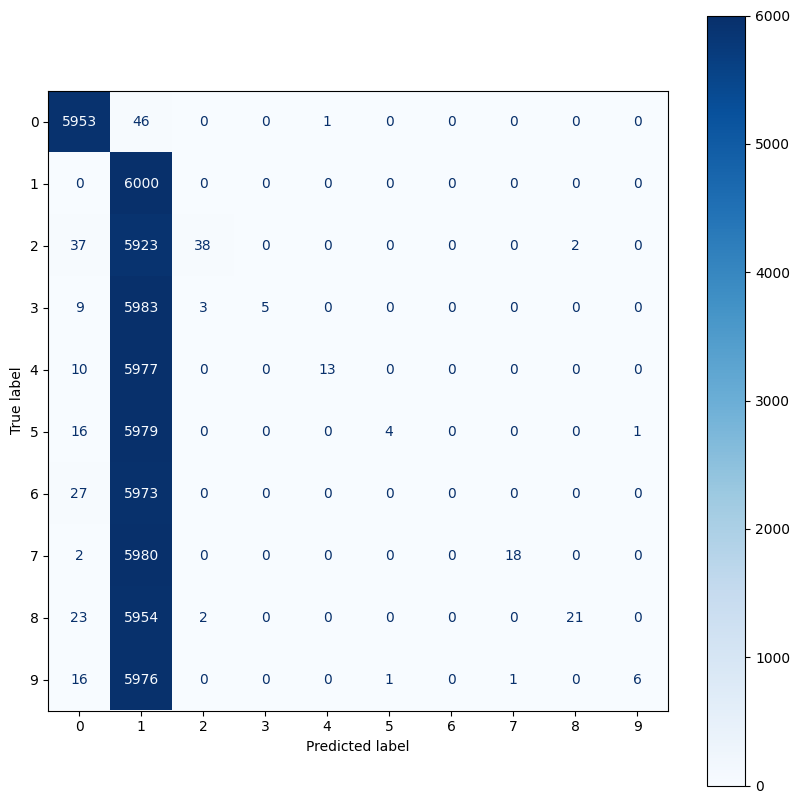

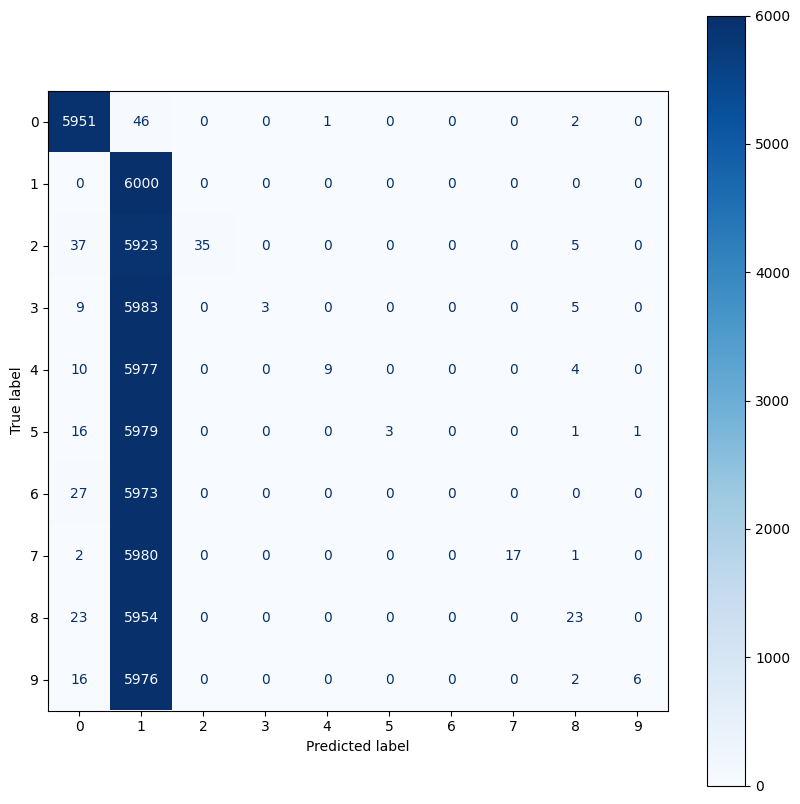

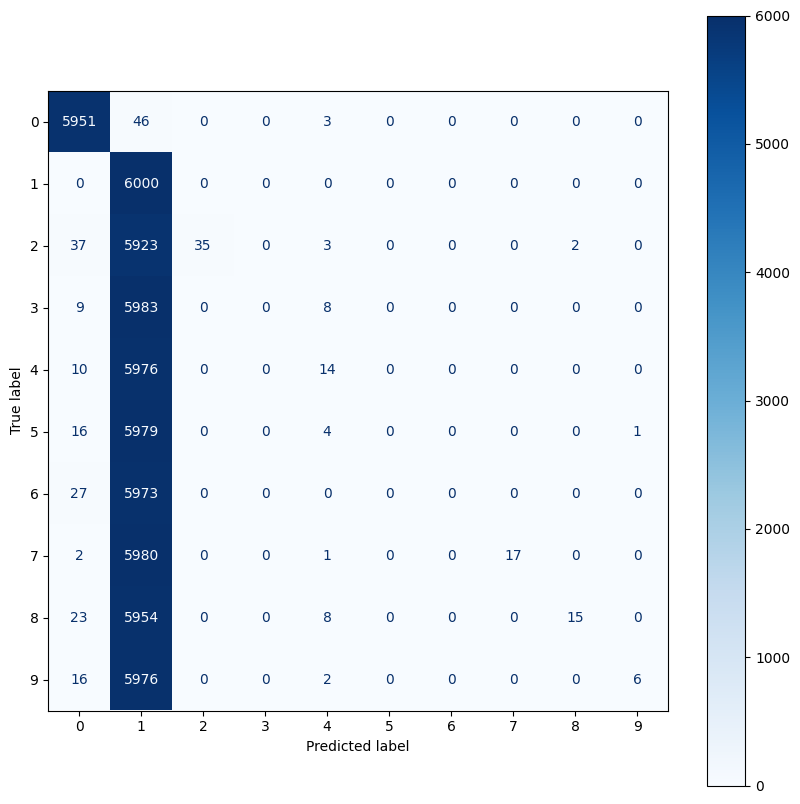

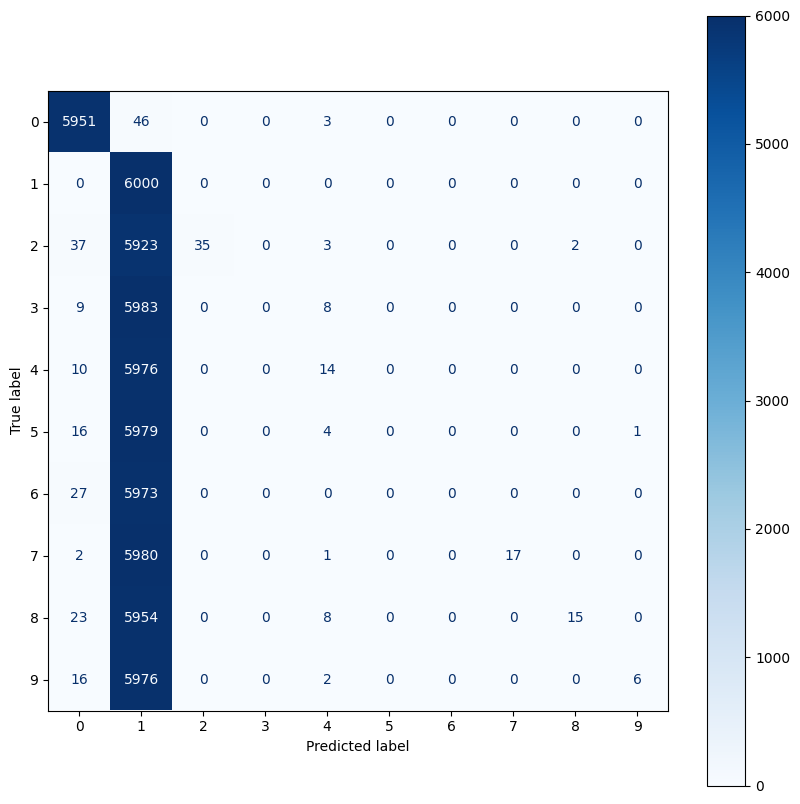

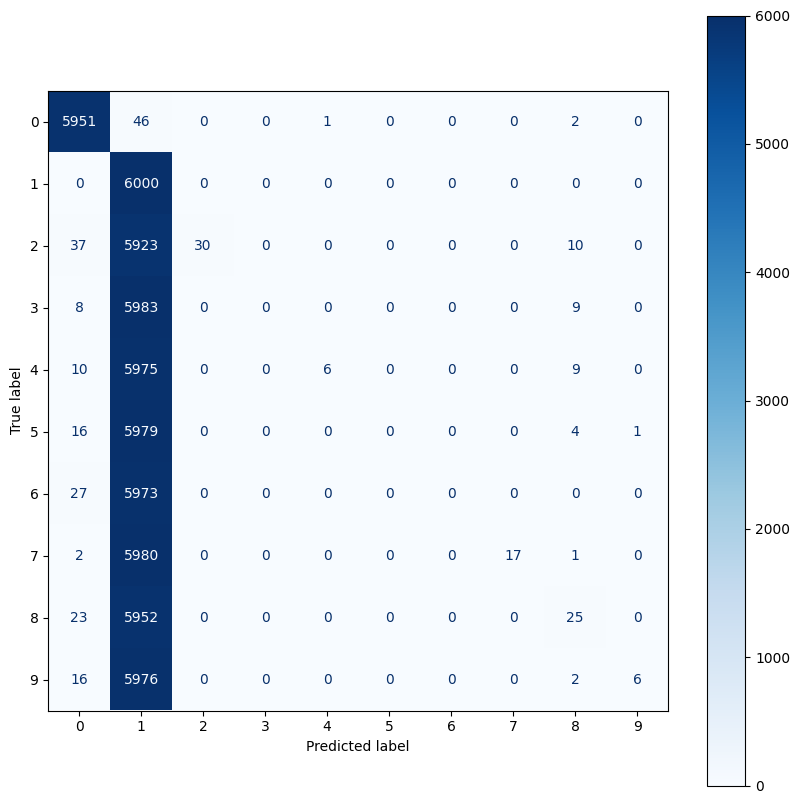

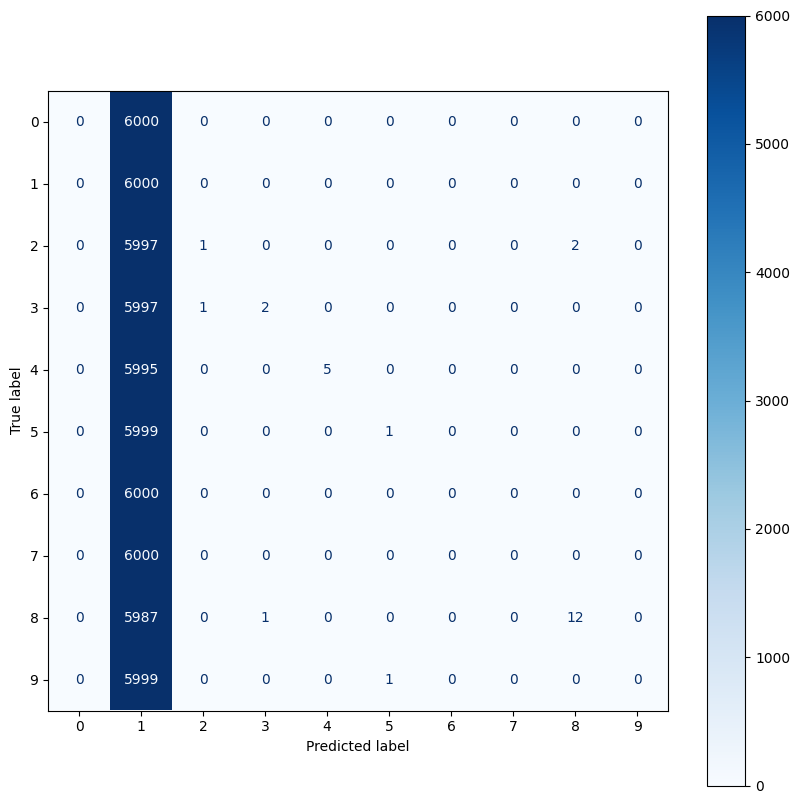

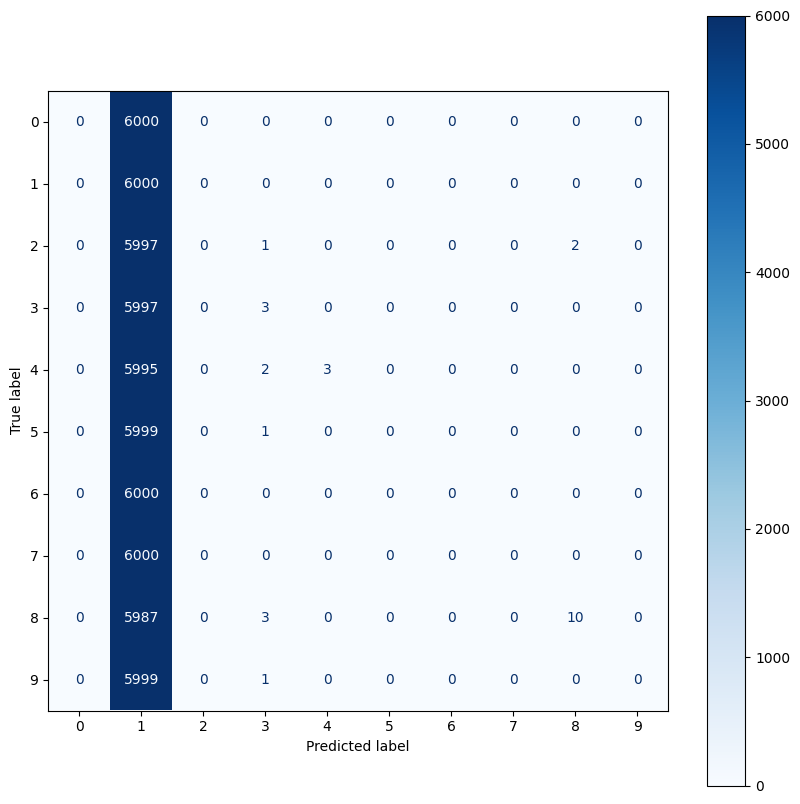

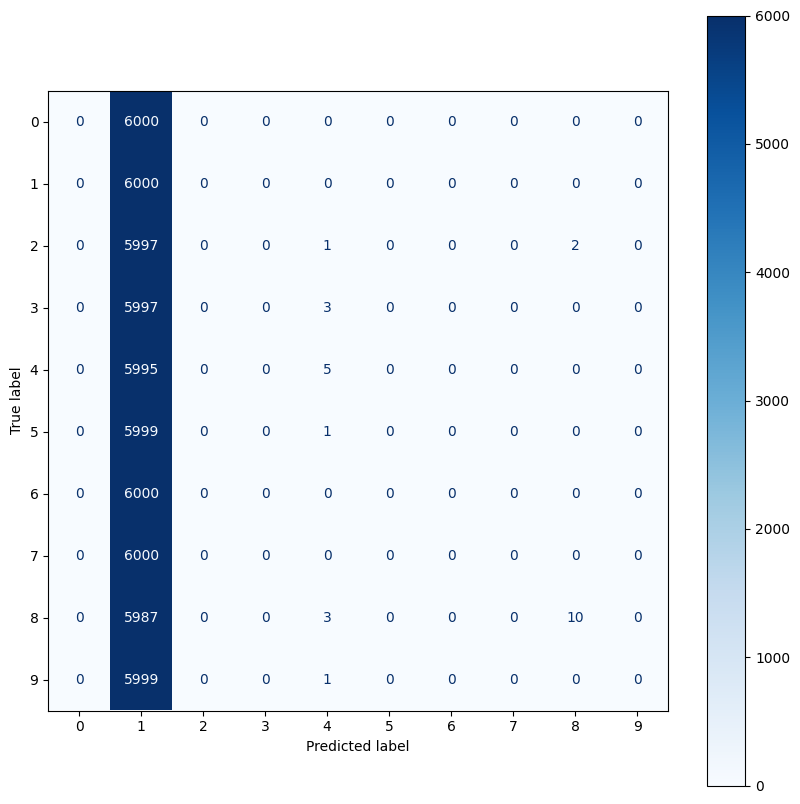

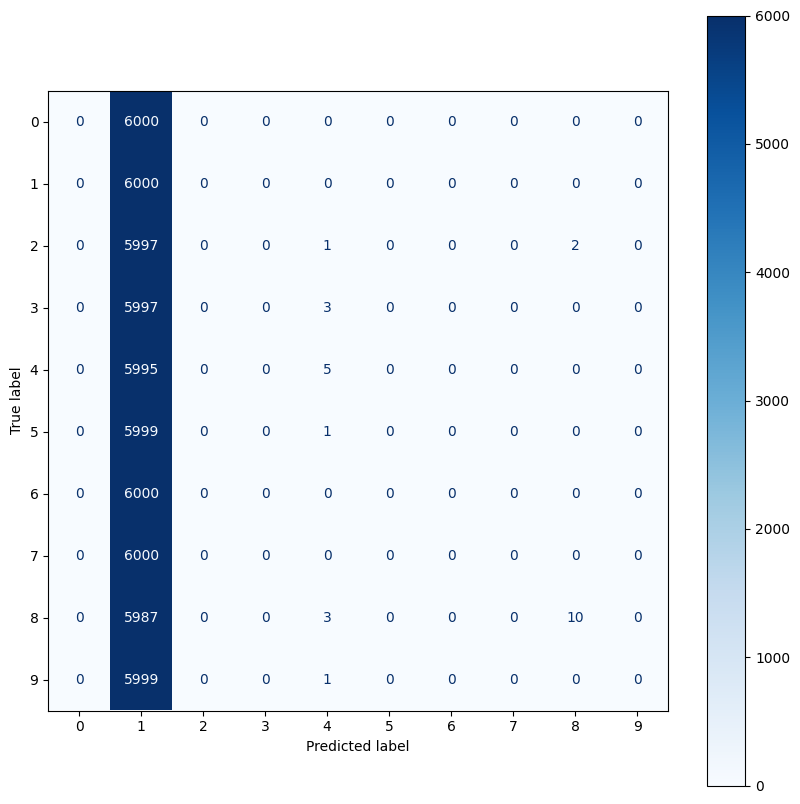

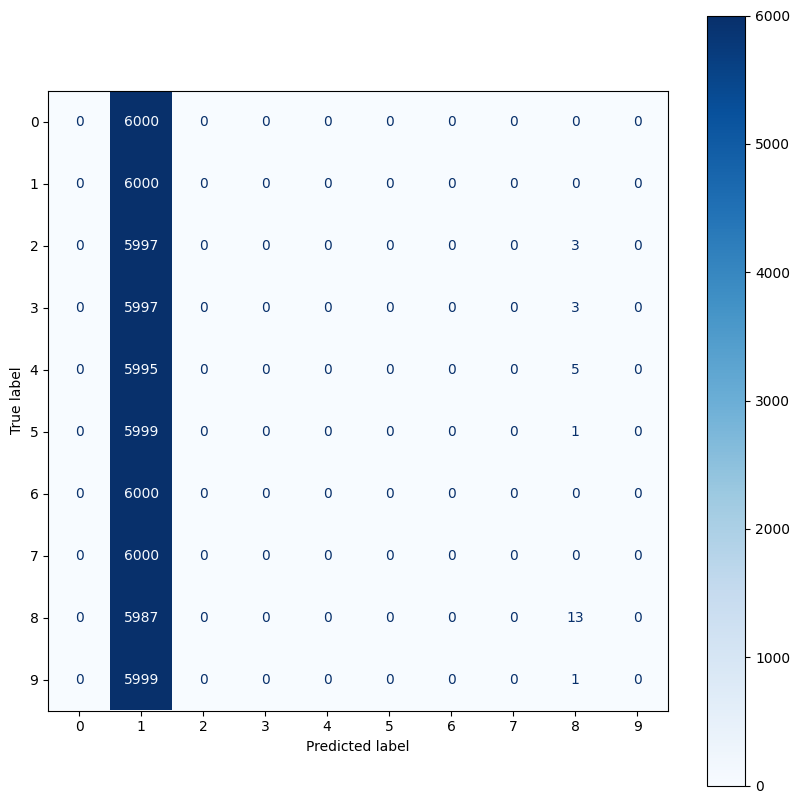

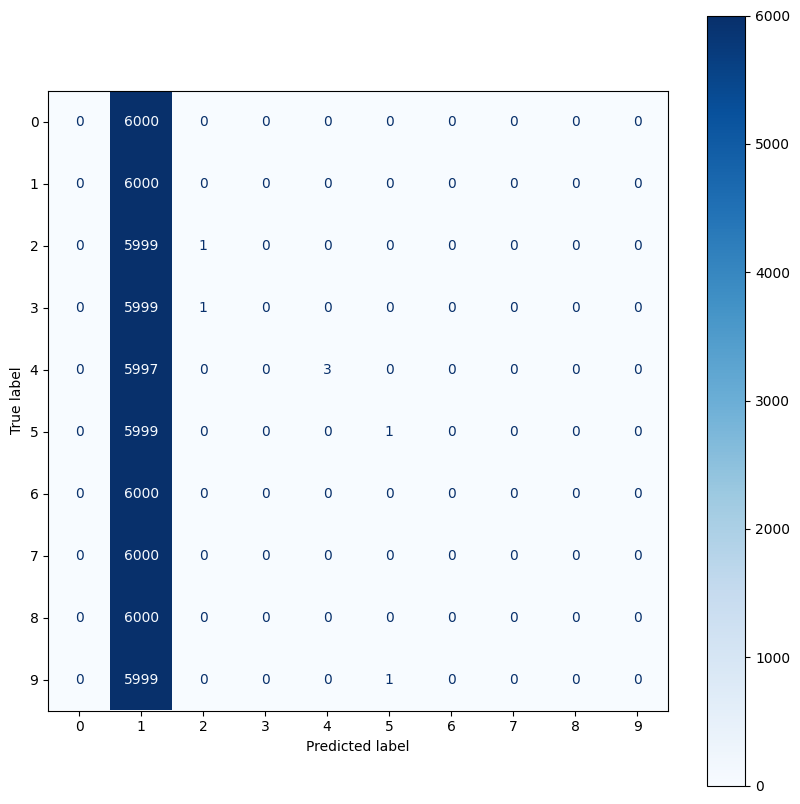

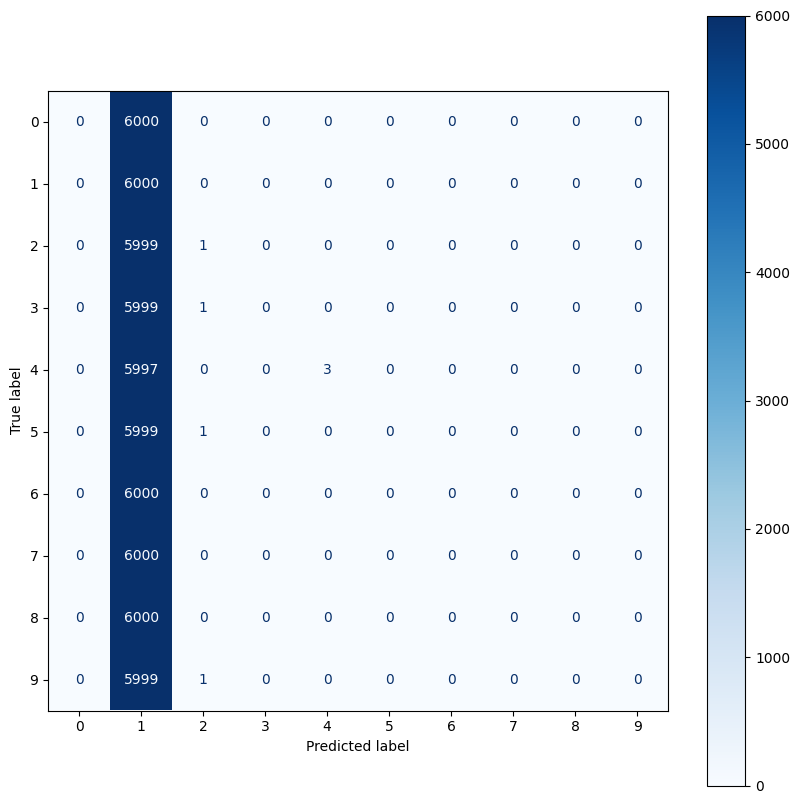

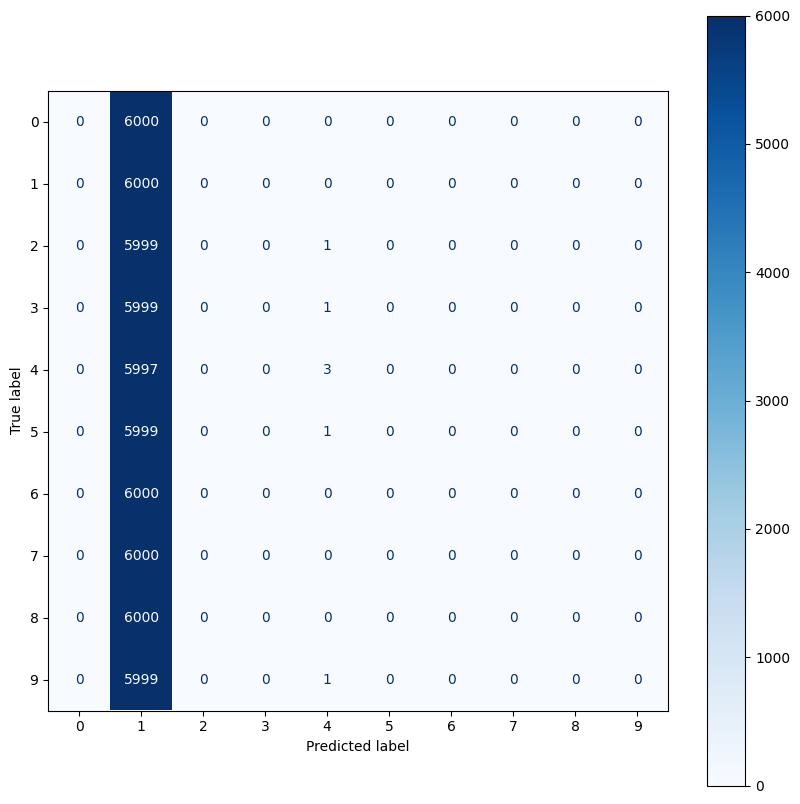

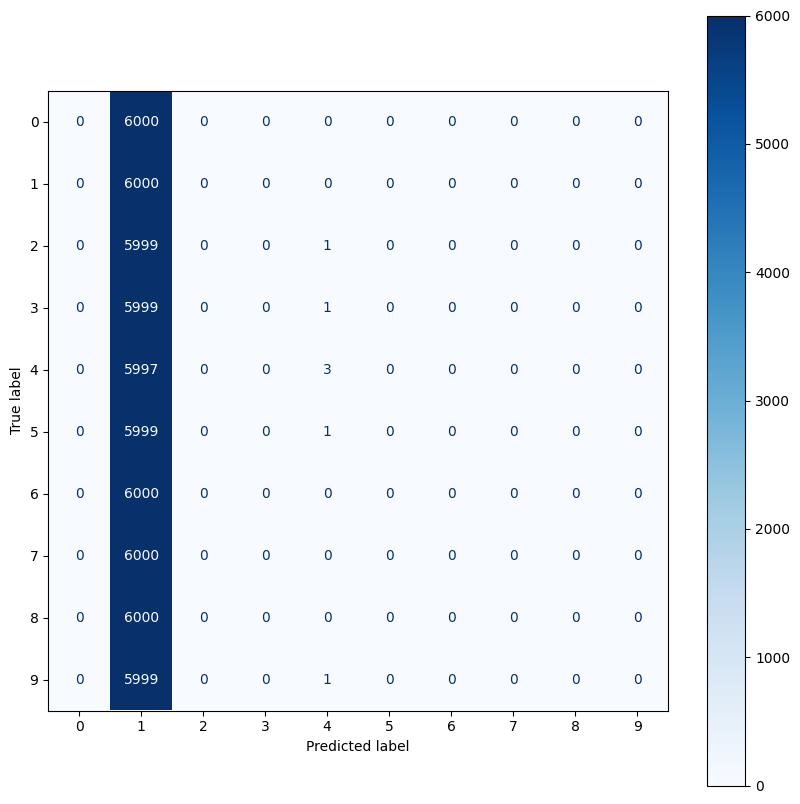

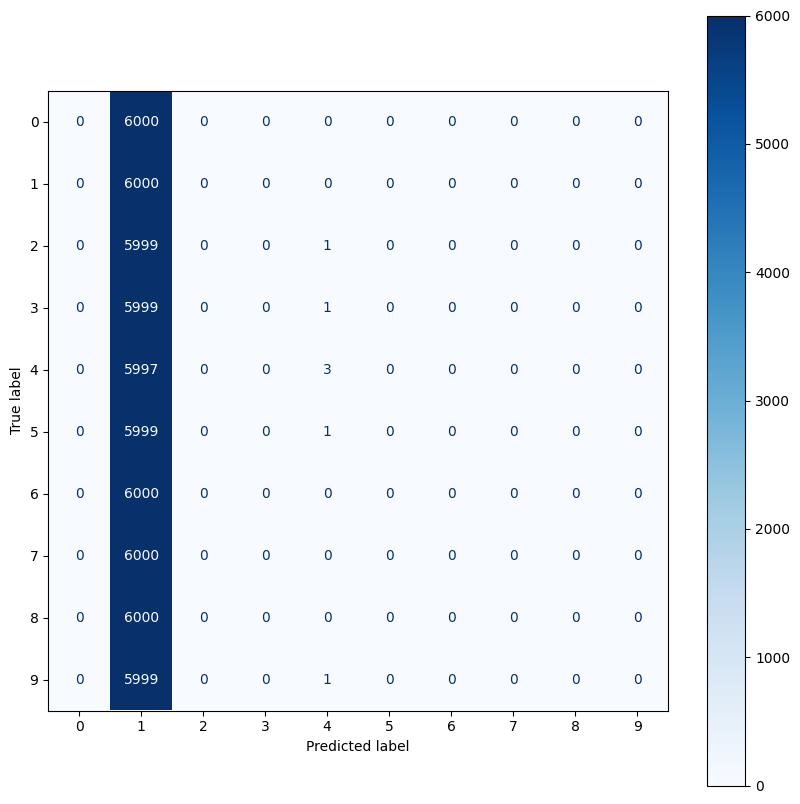

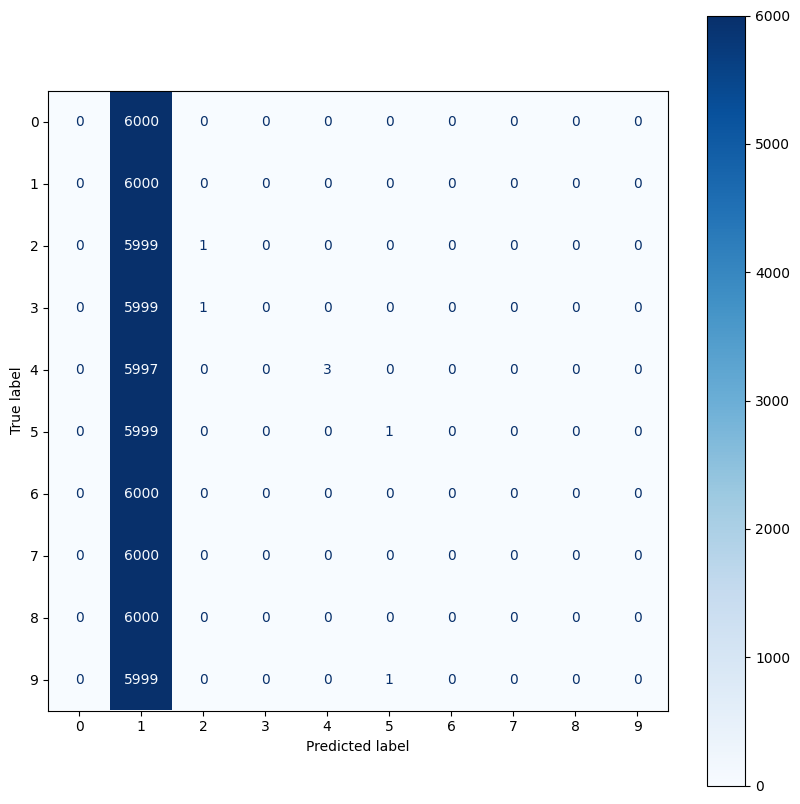

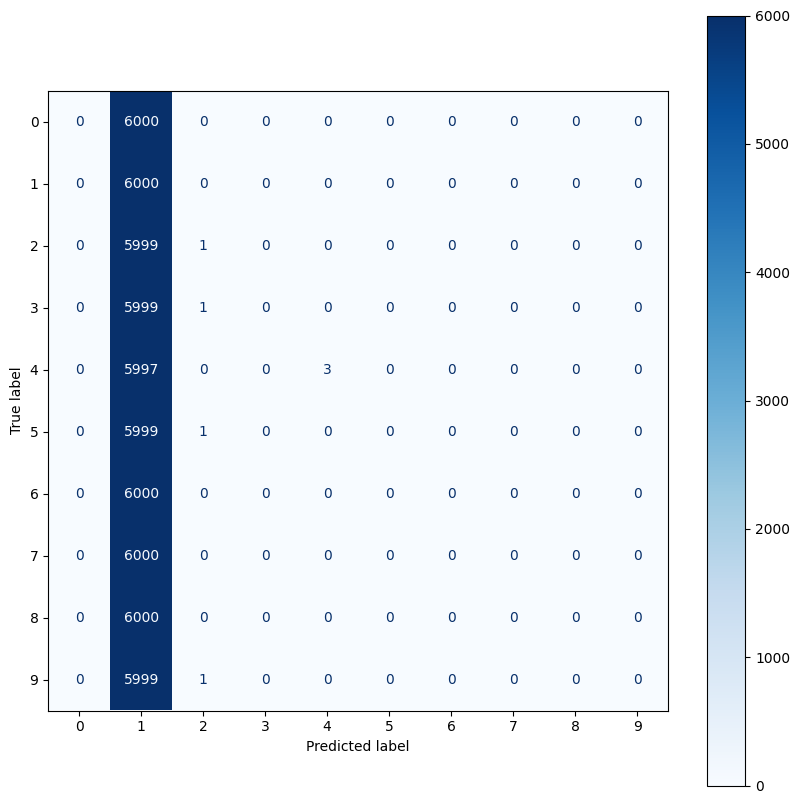

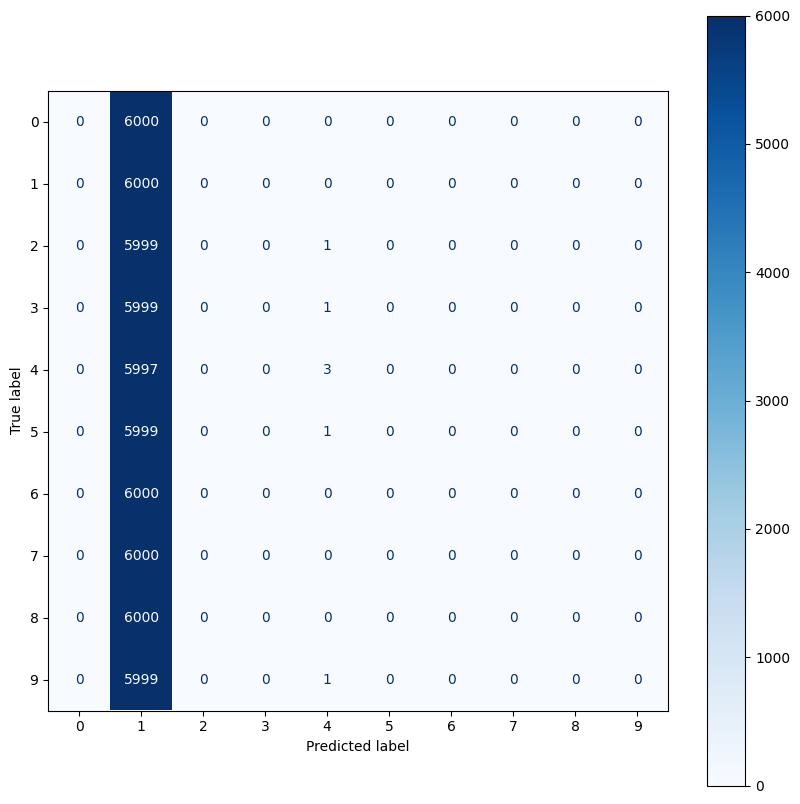

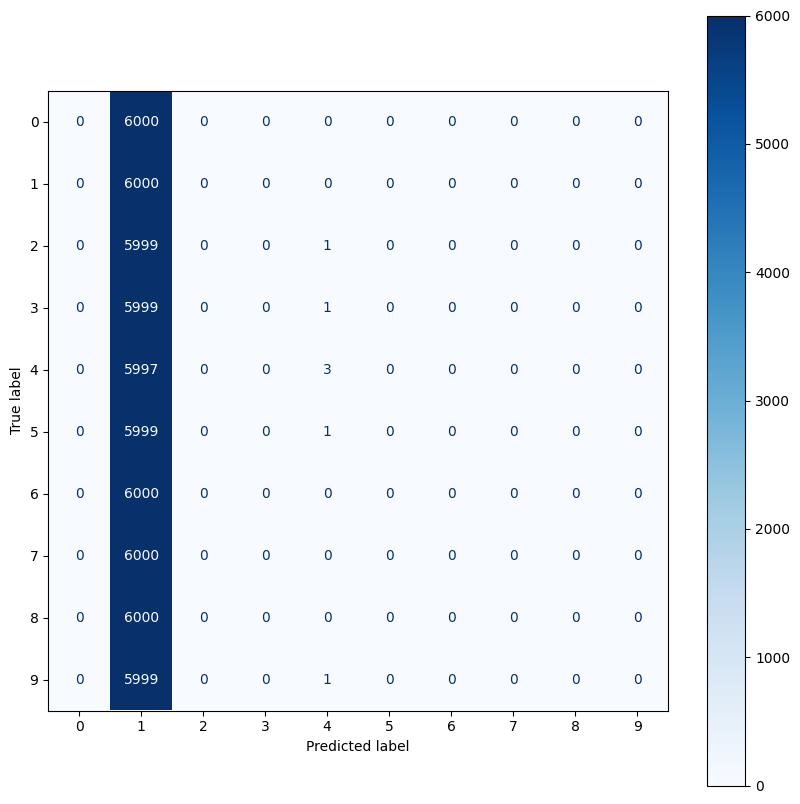

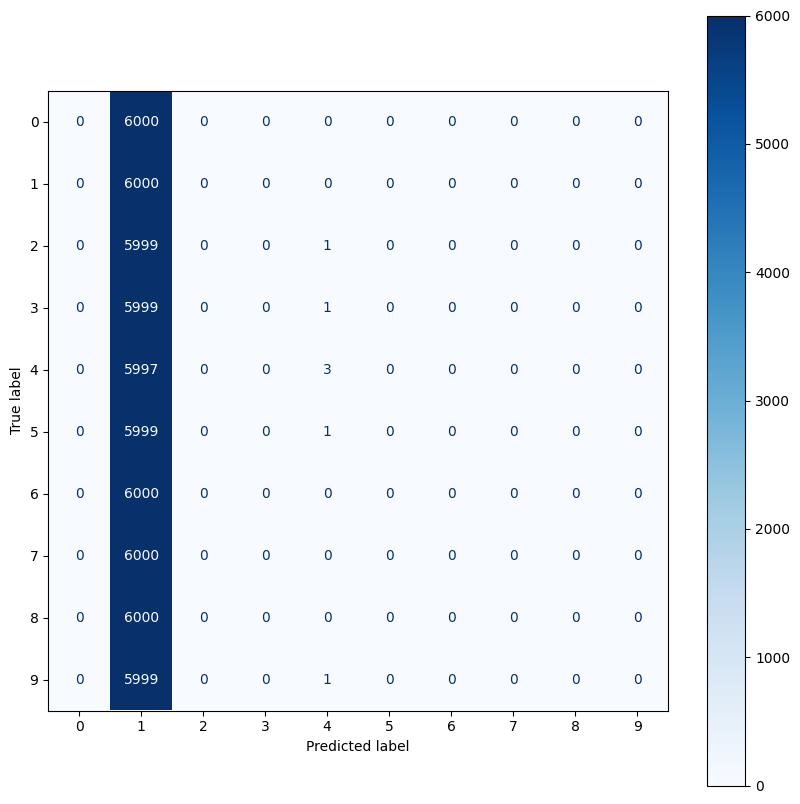

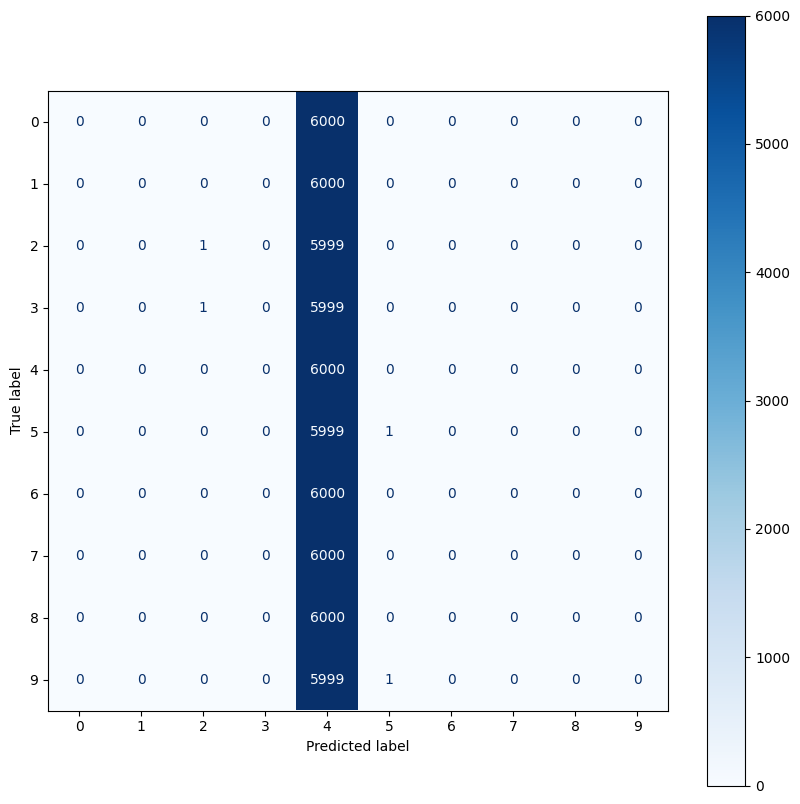

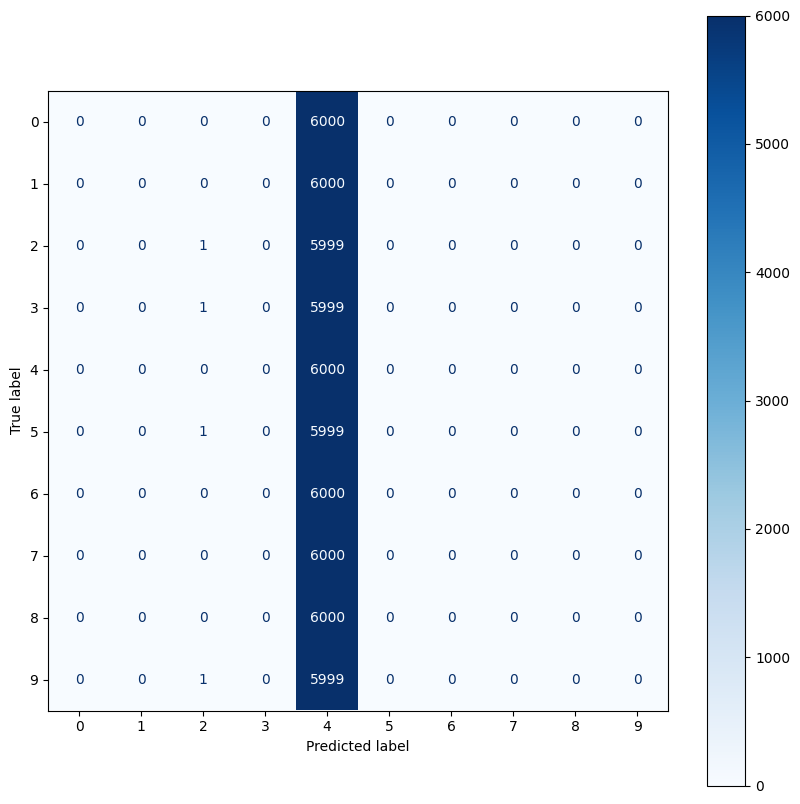

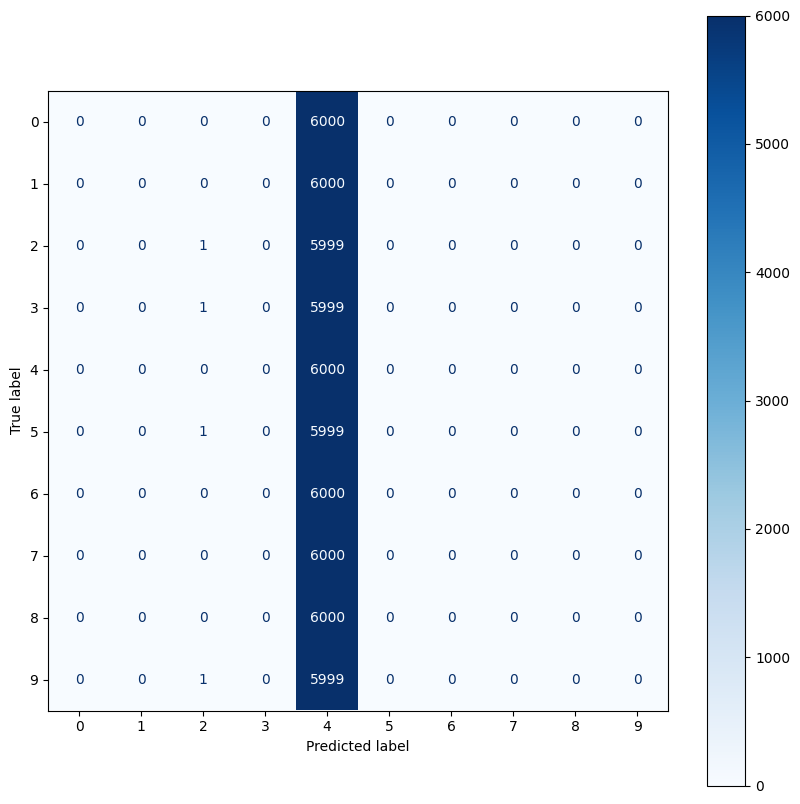

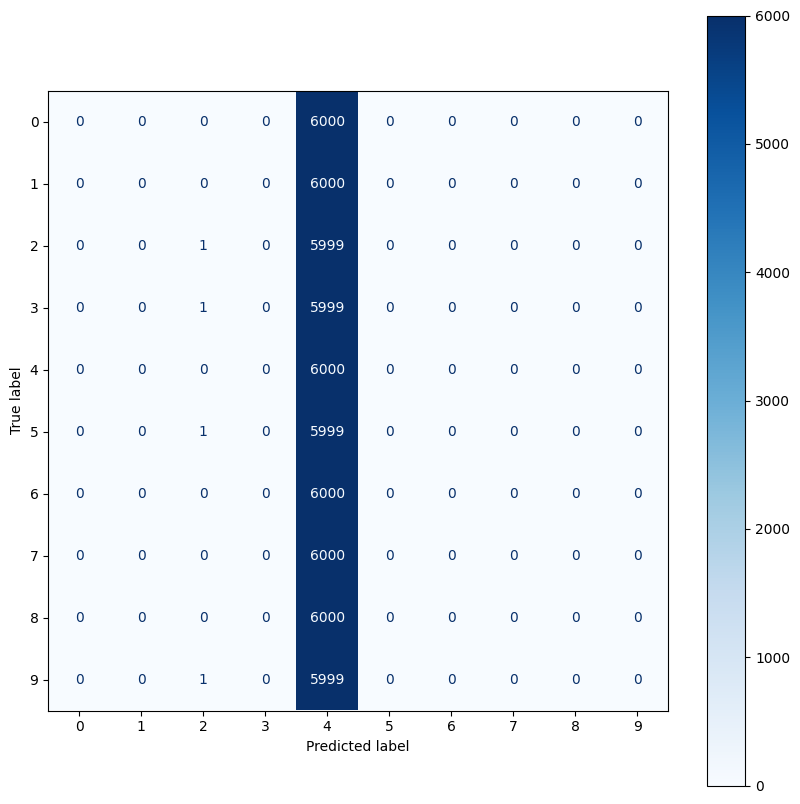

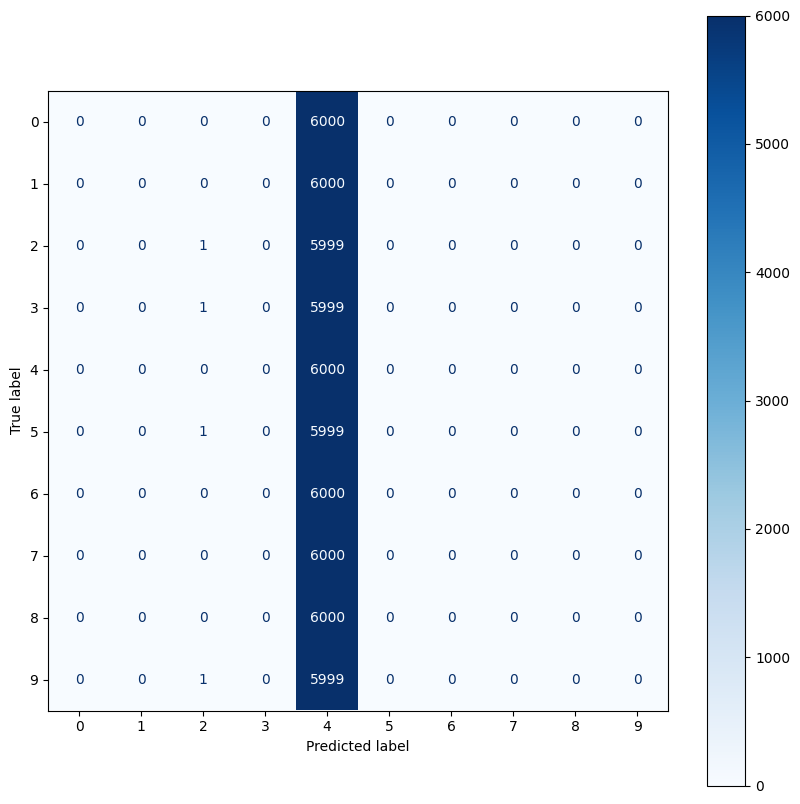

In [ ]:
lengths_tsne = batch_simulation_dbscan(radius_list=radius_list,
                 neighbors_list=neighbors_list,
                 data=X_tsne,
                 labels=train_labels,
                 folder_path=save_folder_path,
                               appendix="_tsne_3_dim")

## TSNE visualization of the entire MNIST dataset

In [ ]:
tsne = TSNE(n_components=2, random_state=42, verbose=3)

In [ ]:
X_reduced = tsne.fit_transform(train_data)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 60000 samples in 0.011s...
[t-SNE] Computed neighbors for 60000 samples in 12.335s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60000
[t-SNE] Computed conditional probabilities for sample 2000 / 60000
[t-SNE] Computed conditional probabilities for sample 3000 / 60000
[t-SNE] Computed conditional probabilities for sample 4000 / 60000
[t-SNE] Computed conditional probabilities for sample 5000 / 60000
[t-SNE] Computed conditional probabilities for sample 6000 / 60000
[t-SNE] Computed conditional probabilities for sample 7000 / 60000
[t-SNE] Computed conditional probabilities for sample 8000 / 60000
[t-SNE] Computed conditional probabilities for sample 9000 / 60000
[t-SNE] Computed conditional probabilities for sample 10000 / 60000
[t-SNE] Computed conditional probabilities for sample 11000 / 60000
[t-SNE] Computed conditional probabilities for sample 12000 / 60000
[t-SNE] Computed conditional probabilities for sa

In [ ]:
X_reduced.shape

(60000, 2)

In [ ]:
import colorsys

def get_n_colors(n):
    colors = []
    for i in range(n):
        hue = i / n  # evenly spaced hues between 0 and 1
        lightness = 0.5
        saturation = 0.9
        rgb = colorsys.hls_to_rgb(hue, lightness, saturation)
        # Convert RGB [0,1] to hex string
        colors.append('#{:02x}{:02x}{:02x}'.format(
            int(rgb[0]*255), int(rgb[1]*255), int(rgb[2]*255)
        ))
    return colors

colors = get_n_colors(10)

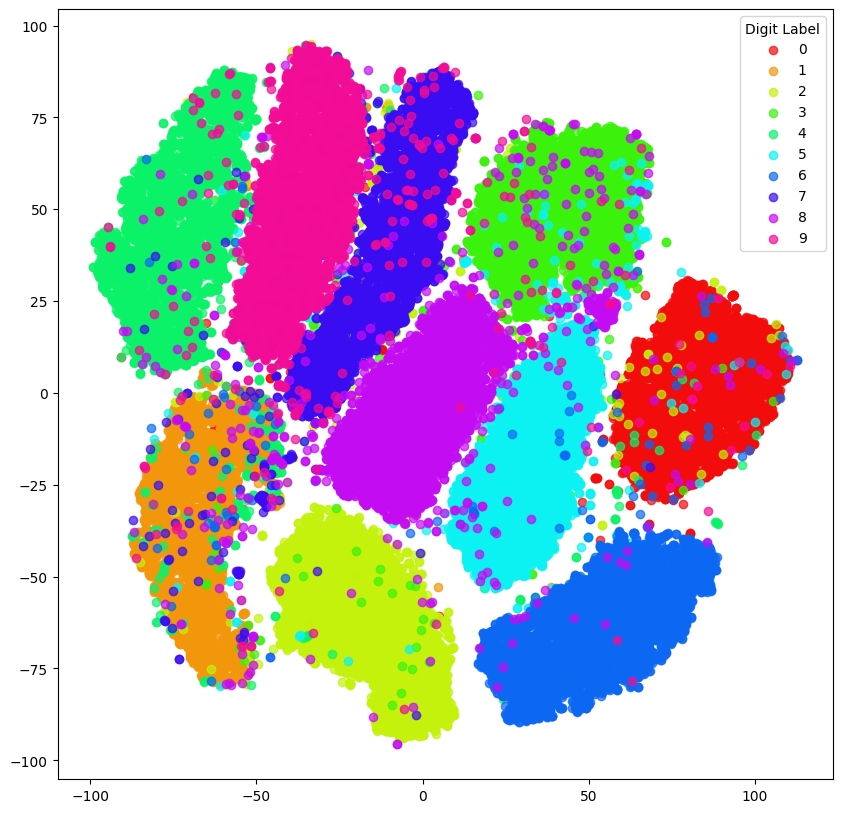

In [ ]:
plt.figure(figsize=(10,10))
for digit in range(10):
    idx = train_labels == digit
    plt.scatter(X_reduced[idx,0], X_reduced[idx,1], color=colors[digit], label=str(digit), alpha=0.7)
plt.legend(title="Digit Label")
plt.show()